# Inpatient Sensor BBS Automation Models

Adam P. Horin, PhD

August 31, 2020

# Table of Contents

1. [BBS](#bbs)

    1.1 [Linear Regression](#bbs_lin)
    
    1.2 [Decision Tree](#bbs_tree)
    
    1.3 [Random Forest](#bbs_forest)
    
    1.4 [Ridge](#bbs_ridge)
    
    1.5 [Lasso](#bbs_lasso)
    
    1.6 [Elastic Net](#bbs_enet)
    

In [134]:
# load pandas and numpy
import numpy as np
import pandas as pd


In [135]:
# To display rows and columns without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)


In [136]:
# load data

fulldata = pd.read_csv(r"C:\Users\ahorin\Documents\Inpatient Sensor Code AH\Machine_Learning_BBS\FeatureMatrix_BBS_ALL.csv", sep=',')
fulldata.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3,7,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


subject group        dob admission_date        doe  age sex  \
0  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
1  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
2  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
3  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
4  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    

                 race  height_cm  weight_kg  lifestyle highest_grade  \
0  White/Non-Hispanic  172.72     62.2       Sedentary  12             
1  White/Non-Hispanic  172.72     62.2       Sedentary  12             
2  White/Non-Hispanic  172.72     62.2       Sedentary  12             
3  White/Non-Hispanic  172.72     62.2       Sedentary  12             
4  White/Non-Hispanic  172.72     62.2       Sedentary  12             

  highest_degree  cva_date  cva_to_admission_time lesion_location hemiparesis  \
0  HS             3/3/2018  33.0                   R               L            
1  HS             3/3/2018  33.0                   R               L            
2  HS             3/3/2018  33.0                   R               L            
3  HS             3/3/2018  33.0                   R               L            
4  HS             3/3/2018  33.0                   R               L            

  lesion_distribution lesion_location.1    etiology stay_length  \
0  BG                  Brainstem         hemmorrage  19           
1  BG                  Brainstem         hemmorrage  19           
2  BG                  Brainstem         hemmorrage  19           
3  BG                  Brainstem         hemmorrage  19           
4  BG                  Brainstem         hemmorrage  19           

  language_dx_yn voice_dx_severity                      language_dx  \
0  Y              Mild              Undifferentiated aphasia fluent   
1  Y              Mild              Undifferentiated aphasia fluent   
2  Y              Mild              Undifferentiated aphasia fluent   
3  Y              Mild              Undifferentiated aphasia fluent   
4  Y              Mild              Undifferentiated aphasia fluent   

  cog_comm_dx cog_comm_type cog_comm_severity dysphagia dysphagia_severity  \
0  N           NaN           NaN               N         absent              
1  N           NaN           NaN               N         absent              
2  N           NaN           NaN               N         absent              
3  N           NaN           NaN               N         absent              
4  N           NaN           NaN               N         absent              

  diet_admission diet_discharge speech_dx_yn  speech_severity  \
0  regular/thin   regular/thin   N            Mild - Moderate   
1  regular/thin   regular/thin   N            Mild - Moderate   
2  regular/thin   regular/thin   N            Mild - Moderate   
3  regular/thin   regular/thin   N            Mild - Moderate   
4  regular/thin   regular/thin   N            Mild - Moderate   

              speech_dx cardiac_hx afib HTN HLD OSA PVD DM other_neuro  \
0  Aphonia - dysphonia   Y          0    Y   N   Y   N   N  Y            
1  Aphonia - dysphonia   Y          0    Y   N   Y   N   N  Y            
2  Aphonia - dysphonia   Y          0    Y   N   Y   N   N  Y            
3  Aphonia - dysphonia   Y          0    Y   N   Y   N   N  Y            
4  Aphonia - dysphonia   Y          0    Y   N   Y   N   N  Y            

  neuro_specify trach renal druguse_hx movement_disorders comorbidities  \
0  L-SDH         N     Y     N          N                  0              
1  L-SDH         N     Y     N          N                  0              
2  L-SDH         N     Y     N          N                  0              
3  L-SDH         N     Y     N          N                  0              
4  L-SDH         N     Y     N          N                  0              

  beta_blockers  BBS_total  BBS_subscore  6MWT  10MWT_SSV  10MWT_FV  TUG  \
0  Y             15.0       3

In [137]:
# add fallrisk variable
fulldata['fallrisk'] = np.where(fulldata['BBS_total']<= 44, 1, 0) # 1 is yes for fall risk, 0 is no for fall risk
fulldata.head(100)


subject group        dob admission_date        doe  age sex  \
0   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
1   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
2   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
3   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
4   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
5   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
6   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
7   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
8   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
9   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
10  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
11  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
12  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
13  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
14  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
15  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
16  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
17  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
18  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
19  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
20  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
21  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
22  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
23  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
24  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
25  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
26  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
27  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
28  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
29  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
30  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
31  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
32  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
33  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
34  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
35  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
36  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
37  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
38  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
39  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
40  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
41  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
42  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
43  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
44  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
45  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
46  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
47  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
48  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
49  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
50  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
51  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
52  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
53  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
54  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
55  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
56  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
57  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
58  CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
59  CVA01   CVA   7/21/1954  4/5/2018      

In [138]:
# filter data
# session 1 and 4; admission and discharge time points
# trial_No N02; standing for 2 minutes trial

data_filt = fulldata[(fulldata.trial_No == 'N02') & ((fulldata.session == 1) | (fulldata.session == 4))]
data_filt = data_filt[data_filt['SC_Gyr_x_mean'].notna()] # also remove no sensor data
data_filt.shape


(1332, 164)

## Prepare data sets
Each data set used for the clinical score models will be a different size dependent on whether each participant has that clinical score


### BBS
<a id="bbs"></a>

In [7]:
data_bbs = data_filt.dropna(subset=['BBS_total'])
data_bbs.shape

(1332, 164)

In [8]:
# descriptive statistics
data_bbs.describe()
# the sway features have a really large range which is throughing off some of the models

age    height_cm    weight_kg  cva_to_admission_time  \
count  1332.000000  1332.000000  1332.000000  882.000000              
mean   53.175676    172.154912   78.915399    15.877551               
std    15.250005    11.058780    18.927001    23.179034               
min    22.000000    149.860000   42.700000    3.000000                
25%    44.000000    162.635000   63.503000    5.000000                
50%    55.000000    172.720000   76.400000    8.000000                
75%    65.000000    180.340000   93.000000    14.000000               
max    86.000000    195.600000   136.078000   181.000000              

         BBS_total  BBS_subscore         6MWT    10MWT_SSV    10MWT_FV  \
count  1332.000000  1332.000000   1224.000000  1107.000000  990.000000   
mean   36.858108    2.959459      329.552449   0.941678     1.519882     
std    19.410551    1.537855      227.743963   0.541798     0.762087     
min    1.000000     0.000000      3.962400     0.051865     0.127464     
25%    21.750000    3.000000      106.908600   0.468055     0.888231     
50%    42.000000    4.000000      330.885800   0.952835     1.705459     
75%    56.000000    4.000000      534.504900   1.419849     2.165440     
max    56.000000    4.000000      748.461800   2.367424     3.180662     

               TUG  FIM_motor_admission  FIM_cog_admission  FIM_admission  \
count  1035.000000  882.000000           882.000000         882.000000      
mean   21.635609    36.928571            21.142857          58.071429       
std    33.573209    15.258443            6.295774           19.302082       
min    4.553000     8.000000             9.000000           17.000000       
25%    8.123000     25.000000            16.000000          42.000000       
50%    10.852000    35.500000            20.500000          58.000000       
75%    23.363000    50.000000            25.000000          73.000000       
max    314.273000   73.000000            33.000000          98.000000       

       FIM_motor_discharge  FIM_cog_discharge  FIM_discharge      session  \
count  882.000000           882.000000         882.000000     1332.000000   
mean   59.632653            25.591837          85.142857      1.972973      
std    14.838326            5.344124           18.619861      1.404893      
min    27.000000            12.000000          42.000000      1.000000      
25%    52.000000            23.000000          75.000000      1.000000      
50%    59.000000            26.000000          85.000000      1.000000      
75%    71.000000            29.000000          97.000000      4.000000      
max    89.000000            35.000000          120.000000     4.000000      

            cutoff    trialtime  SC_Gyr_x_mean  SC_Gyr_y_mean  SC_Gyr_z_mean  \
count  1332.000000  1332.000000  1332.000000    1332.000000    1332.000000     
mean   82.222222    62.658811    1.727984       0.255681       0.237590        
std    52.782973    39.776222    1.669586       1.475686       1.070634        
min    15.000000    1.792000    -1.646349      -3.607311      -3.249905        
25%    45.000000    29.984000    0.516595      -0.678188      -0.442782        
50%    75.000000    59.968000    1.189535       0.190900       0.201202        
75%    105.000000   104.960000   2.764724       1.107869       0.915343        
max    200.000000   129.664000   6.967224       4.796408       4.176424        

       SC_Gyr_norm_mean  SC_Gyr_x_range  SC_Gyr_y_range  SC_Gyr_z_range  \
count  1332.000000       1332.000000     1332.000000     1332.000000      
mean   4.025153          28.307206       31.874423       15.347072        
std    1.904948          44.994160       42.262446       20.058206        
min    1.390651          1.586939        1.464866        0.488289         
25%    2.928924          7.446404        8.545053        3.814756         
50%    3.595493          13.611049       17.761499       7.080187         
75%    4.549597          28.564885       36.316470       18.310832        

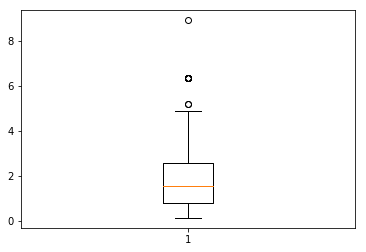

In [148]:
# boxplot of some data
import matplotlib.pyplot as plt

plt.boxplot(data_bbs['f95_AP'])
plt.show()

In [77]:
# filter for counts and summary
data_bbs_15 = data_bbs[data_bbs.cutoff == 15]
data_bbs_15 = data_bbs_15[data_bbs.trialtime > 14]
data_bbs_15.head()

data_bbs_30 = data_bbs[data_bbs.cutoff == 30]
data_bbs_30 = data_bbs_30[data_bbs.trialtime > 29]
data_bbs_30.head()

data_bbs_45 = data_bbs[data_bbs.cutoff == 45]
data_bbs_45 = data_bbs_45[data_bbs.trialtime > 44]
data_bbs_45.head()

data_bbs_60 = data_bbs[data_bbs.cutoff == 60]
data_bbs_60 = data_bbs_60[data_bbs.trialtime > 59]
data_bbs_60.head()

data_bbs_75 = data_bbs[data_bbs.cutoff == 75]
data_bbs_75 = data_bbs_75[data_bbs.trialtime > 74]
data_bbs_75.head()

data_bbs_90 = data_bbs[data_bbs.cutoff == 90]
data_bbs_90 = data_bbs_90[data_bbs.trialtime > 89]
data_bbs_90.head()

data_bbs_105 = data_bbs[data_bbs.cutoff == 105]
data_bbs_105 = data_bbs_105[data_bbs.trialtime > 104]
data_bbs_105.head()

data_bbs_120 = data_bbs[data_bbs.cutoff == 120]
data_bbs_120 = data_bbs_120[data_bbs.trialtime > 119]
data_bbs_120.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: B

subject group        dob admission_date        doe  age sex  \
394   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
520   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
898   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
1024  CVA03   CVA   5/21/1960  4/19/2018      4/25/2018  57   F    
1402  CVA03   CVA   5/21/1960  4/19/2018      4/25/2018  57   F    

                     race  height_cm  weight_kg      lifestyle highest_grade  \
394   White/Non-Hispanic   172.72     62.2       Sedentary      12             
520   White/Hispanic       160.00     61.0       Highly-active  20             
898   White/Hispanic       160.00     61.0       Highly-active  20             
1024  White/Non-Hispanic   175.30     101.8      Sedentary      19             
1402  White/Non-Hispanic   175.30     101.8      Sedentary      19             

     highest_degree   cva_date  cva_to_admission_time lesion_location  \
394   HS             3/3/2018   33.0                   R                
520   MD, Doctorate  4/9/2018   3.0                    R                
898   MD, Doctorate  4/9/2018   3.0                    R                
1024  JD, Doctorate  4/15/2018  4.0                    0                
1402  JD, Doctorate  4/15/2018  4.0                    0                

     hemiparesis lesion_distribution lesion_location.1    etiology  \
394   L           BG                  Brainstem         hemmorrage   
520   L           BG                  Brainstem         ischemic     
898   L           BG                  Brainstem         ischemic     
1024  0           pons                Brainstem         hemmorrage   
1402  0           pons                Brainstem         hemmorrage   

     stay_length language_dx_yn voice_dx_severity  \
394   19          Y              Mild               
520   17          N              NaN                
898   17          N              NaN                
1024  35          N              NaN                
1402  35          N              NaN                

                          language_dx cog_comm_dx cog_comm_type  \
394   Undifferentiated aphasia fluent  N           NaN            
520   NaN                              Y           Unknown        
898   NaN                              Y           Unknown        
1024  NaN                              N           NaN            
1402  NaN                              N           NaN            

     cog_comm_severity dysphagia dysphagia_severity diet_admission  \
394   NaN               N         absent             regular/thin    
520   Mild              N         absent             regular/thin    
898   Mild              N         absent             regular/thin    
1024  did not assess    Y         moderate           soft/nectar     
1402  did not assess    Y         moderate           soft/nectar     

     diet_discharge speech_dx_yn  speech_severity  \
394   regular/thin   N            Mild - Moderate   
520   regular/thin   Y            Mild - Moderate   
898   regular/thin   Y            Mild - Moderate   
1024  regular/thin   Y            Moderate          
1402  regular/thin   Y            Moderate          

                                     speech_dx cardiac_hx afib HTN HLD OSA  \
394   Aphonia - dysphonia                       Y          0    Y   N   Y    
520   Unilateral upper motor neuron dysarthria  N          0    Y   Y   N    
898   Unilateral upper motor neuron dysarthria  N          0    Y   Y   N    
1024  Undifferentiated flaccid dysarthria       N          0    Y   N   N    
1402  Undifferentiated flaccid dysarthria       N          0    Y   N   N    

     PVD DM other_neuro neuro_specify trach renal druguse_hx  \
394   N   N  Y           L-SDH         N     Y     N           
520   N   N  N           NaN           N     N     N           
898   N   N  N           NaN           N     N     N           
1024  N   N  N           NaN           N     N     N           
1402

In [78]:
# groupby group and get more summary statistics
data_bbs_15.groupby(['group', 'session']).agg({
    'subject': ["count"],
    'BBS_total': ["count", min, max, "mean", "std"]
})

subject BBS_total                                  
                   count     count   min   max       mean        std
group    session                                                    
CONTROLS 1        50      50        54.0  56.0  55.860000  0.452205 
CVA      1        43      43        1.0   55.0  26.418605  15.975029
         4        43      43        3.0   56.0  33.883721  15.519894

In [80]:
# groupby group and get more summary statistics
data_bbs_30.groupby(['group', 'session']).agg({
    'subject': ["count"],
    'BBS_total': ["count", min, max, "mean", "std"]
})

subject BBS_total                                  
                   count     count   min   max       mean        std
group    session                                                    
CONTROLS 1        50      50        54.0  56.0  55.860000  0.452205 
CVA      1        40      40        1.0   55.0  27.450000  16.092601
         4        39      39        3.0   56.0  36.615385  13.523110

In [81]:
# groupby group and get more summary statistics
data_bbs_45.groupby(['group', 'session']).agg({
    'subject': ["count"],
    'BBS_total': ["count", min, max, "mean", "std"]
})

subject BBS_total                                  
                   count     count   min   max       mean        std
group    session                                                    
CONTROLS 1        50      50        54.0  56.0  55.860000  0.452205 
CVA      1        34      34        1.0   55.0  31.205882  14.358567
         4        38      38        4.0   56.0  37.500000  12.508916

In [82]:
# groupby group and get more summary statistics
data_bbs_60.groupby(['group', 'session']).agg({
    'subject': ["count"],
    'BBS_total': ["count", min, max, "mean", "std"]
})

subject BBS_total                                 
                   count     count   min   max      mean        std
group    session                                                   
CONTROLS 1        50      50        54.0  56.0  55.86000  0.452205 
CVA      1        32      32        4.0   55.0  33.03125  12.685995
         4        38      38        4.0   56.0  37.50000  12.508916

In [83]:
# groupby group and get more summary statistics
data_bbs_75.groupby(['group', 'session']).agg({
    'subject': ["count"],
    'BBS_total': ["count", min, max, "mean", "std"]
})

subject BBS_total                                 
                   count     count   min   max      mean        std
group    session                                                   
CONTROLS 1        50      50        54.0  56.0  55.86000  0.452205 
CVA      1        32      32        4.0   55.0  33.03125  12.685995
         4        38      38        4.0   56.0  37.50000  12.508916

In [84]:
# groupby group and get more summary statistics
data_bbs_90.groupby(['group', 'session']).agg({
    'subject': ["count"],
    'BBS_total': ["count", min, max, "mean", "std"]
})

subject BBS_total                              
                   count     count   min   max   mean        std
group    session                                                
CONTROLS 1        50      50        54.0  56.0  55.86  0.452205 
CVA      1        30      30        4.0   55.0  33.90  12.628239
         4        38      38        4.0   56.0  37.50  12.508916

In [85]:
# groupby group and get more summary statistics
data_bbs_105.groupby(['group', 'session']).agg({
    'subject': ["count"],
    'BBS_total': ["count", min, max, "mean", "std"]
})

subject BBS_total                              
                   count     count   min   max   mean        std
group    session                                                
CONTROLS 1        50      50        54.0  56.0  55.86  0.452205 
CVA      1        30      30        4.0   55.0  33.90  12.628239
         4        38      38        4.0   56.0  37.50  12.508916

In [86]:
# groupby group and get more summary statistics
data_bbs_120.groupby(['group', 'session']).agg({
    'subject': ["count"],
    'BBS_total': ["count", min, max, "mean", "std"]
})


subject BBS_total                              
                   count     count   min   max   mean        std
group    session                                                
CONTROLS 1        50      50        54.0  56.0  55.86  0.452205 
CVA      1        30      30        4.0   55.0  33.90  12.628239
         4        38      38        4.0   56.0  37.50  12.508916

### Linear Regression Model
<a id="bbs_lin"></a>

In [194]:
# loop for linear regression model for BBS score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

i=0
RMSE = np.zeros(8)
MAE = np.zeros(8)
MAEP = np.zeros(8)
Time = np.zeros(8)
for n in [15, 30, 45, 60, 75, 90, 105, 120]:
    data_filter = data_bbs.query('cutoff ==@n')
    data_filter = data_filter[data_filter.trialtime > n-1]
    
# clinical scores only
    data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
    feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG']]
    
#     # balance features and clinical scores
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
#     # balance features
#     feature_df = data_filter[['f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]

# # general features
#     feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
#        'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
#        'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
#        'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
#        'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
#        'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
#        'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
#        'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
#        'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
#        'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
#        'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
#        'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
#        'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
#        'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
#        'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
#        'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
#        'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
#        'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
#        'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
#        'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
#        'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
#        'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
#        'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
#        'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
#        'SC_Gyr_norm_PSD_kurtosis']]


# general and balance features
    feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
       'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
       'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
       'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
       'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
       'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
       'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
       'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
       'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
       'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
       'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
       'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
       'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
       'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
       'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
       'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
       'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
       'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
       'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
       'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
       'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
       'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
       'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
       'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
       'SC_Gyr_norm_PSD_kurtosis', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
       'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
       'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]

    
    
    
    X_bbs = np.asarray(feature_df)
    y_bbs = data_filter['BBS_total'].values.reshape(-1,1)
    
    model = LinearRegression()
    model.fit(X_bbs, y_bbs)
    
    # Cross validation
    # calculate RMSE
    mse_scores = cross_val_score(model, X_bbs, y_bbs,
                        scoring="neg_mean_squared_error", cv=len(X_bbs)) #leave one out cross validation
    rmse_scores = np.sqrt(-mse_scores)
    
    # calculate MAE and MAE Percent
    mae_scores = cross_val_score(model, X_bbs, y_bbs,
                        scoring="neg_mean_absolute_error", cv=len(X_bbs)) #leave one out cross validation
    maep_scores = mae_scores / np.mean(y_bbs)*100
    
    
    def display_scores(scores):
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard Deviation:", scores.std())

    display_scores(rmse_scores)

    RMSE_mean = np.mean(rmse_scores)
    MAE_mean = np.mean(-mae_scores)
    MAEP_mean = np.mean(-maep_scores)
    

    RMSE[i] = RMSE_mean
    MAE[i] = MAE_mean
    MAEP[i] = MAEP_mean
    Time[i] = n
    
    i=i+1
    
    RMSE_lin_data = pd.DataFrame({'Time': Time,
                                  'Model': ['lin', 'lin', 'lin', 'lin', 'lin', 'lin', 'lin', 'lin'],
                                  'RMSE': RMSE,
                                  'MAE': MAE,
                                 'MAEP': MAEP})
    print(RMSE_lin_data)


Scores: [ 40.3233151   49.16329401   6.19299561 109.40302599   0.84184459
  41.60116962  12.46607621  40.91644644   5.82388987  33.32456952
   1.3828959   12.36249973  80.44009675  41.34264547   3.46492314
  33.75751203  18.89385375  93.15674306  26.57909328   3.55676581
 237.23559897  12.09286506   7.668842    12.33202928  77.03999999
  83.14577674  39.32506569 181.56193066  12.35250598   6.70349324
   0.85655471  10.85623062  27.42683837  14.44571288  17.57016938
   4.82996385   2.41152849   7.82335659   0.28919279  57.91393982
  10.37871954  24.04228799  28.37609924  28.88170878   5.8680087
  64.97903949  76.38342002 117.03242271   2.34121203  36.93491127
  23.1477092    6.81250943  19.97271892  29.35464321   3.68172349
   2.39572318  46.04934677  25.26127619  19.13647766   2.0430634
   9.45204258  15.17765682 190.2823725    6.58740888  28.94753284
  24.08410542  12.26153106  39.28648258  12.55803721  30.86448351
  25.58589004   8.83199563  75.44451097  10.05091066   1.44327944
   4

Scores: [1.89313080e+01 1.24735954e+01 5.04281612e+01 8.15582991e+02
 2.62883956e+01 2.05848519e+01 4.49816367e+01 3.11890537e+01
 1.06788754e+01 1.10244040e+01 6.02881747e+00 1.80284852e+01
 7.87449942e+01 3.97373539e+01 3.38747516e+02 8.11165283e+01
 5.87811890e+00 6.69464246e+00 3.84565569e+01 2.20413783e+01
 4.75819656e+01 3.82292525e+01 1.17416291e+02 2.97104061e+02
 4.23656250e+01 4.43273725e+01 7.38071286e+01 2.13102746e+00
 2.07150081e+01 8.78325455e+01 4.90050396e+00 1.67715276e+01
 2.23024194e+01 5.75035748e+01 5.05752283e+01 6.41607573e+01
 2.01493735e+02 7.63998268e+01 5.71587464e+01 2.70144375e+01
 2.37094665e+01 2.37043942e+01 3.84501679e+01 4.74896065e+01
 8.77013732e+01 4.06220513e+01 3.78223224e+01 4.32842622e+01
 3.61993940e+01 3.45317801e+01 6.58666412e+01 3.04327158e+01
 7.00521202e-01 4.81436649e+01 3.96996919e+01 1.96898216e+01
 1.66543500e+00 4.56447603e+01 4.79879782e+01 3.10290019e+01
 4.70661192e+01 5.45617981e+00 1.19463078e+01 1.53360616e-01
 5.37920751e+01 

In [195]:
RMSE_lin_data

Time Model       RMSE        MAE        MAEP
0  15.0   lin   31.703362  31.703362  68.729923 
1  30.0   lin   52.843025  52.843025  111.878944
2  45.0   lin   54.187787  54.187787  114.726068
3  60.0   lin   63.998519  63.998519  135.497291
4  75.0   lin   43.716729  43.716729  92.556805 
5  90.0   lin   53.015063  53.015063  112.243183
6  105.0  lin   35.166631  35.166631  74.454587 
7  120.0  lin   54.344882  54.344882  115.058669

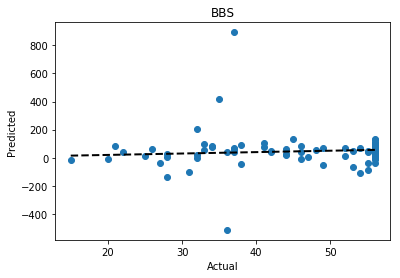

array([[ 6.06491491e+01],
       [ 3.23164681e+00],
       [ 6.92905820e+01],
       [-5.14051242e+02],
       [ 4.38474042e+01],
       [ 3.86836799e+01],
       [-1.92921383e+01],
       [-4.10843629e+01],
       [ 3.50204507e+01],
       [ 5.20187353e+01],
       [ 7.27257736e+01],
       [-6.57082277e-01],
       [-1.39240817e+02],
       [ 5.34399099e+01],
       [-6.42961890e+01],
       [ 7.21216797e+01],
       [ 1.57585827e+01],
       [-6.96458038e+00],
       [ 1.00985532e+02],
       [ 3.73126860e+01],
       [ 1.33774596e+02],
       [ 2.05992710e+02],
       [-1.00403119e+02],
       [ 4.17113842e+02],
       [ 1.02959772e+02],
       [ 8.42669610e+01],
       [ 5.34799155e+01],
       [ 2.10847938e+01],
       [ 1.21827188e+00],
       [ 7.70026167e+01],
       [ 1.31756519e+01],
       [ 4.27040975e+01],
       [ 3.76327488e+01],
       [ 5.86688424e+01],
       [-7.70084855e+00],
       [ 2.25042354e+01],
       [-4.62278139e+01],
       [ 8.52865054e+01],
       [ 2.1

In [197]:
# plot actual vs predicted
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# cross_val_predict on the 120 second data
predicted = cross_val_predict(model, X_bbs, y_bbs, cv=len(X_bbs))

fig, ax = plt.subplots()
ax.scatter(y_bbs, predicted)
ax.plot([y_bbs.min(), y_bbs.max()], [y_bbs.min(), y_bbs.max()], 'k--', lw=2)
plt.title('BBS')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

predicted

### Decision Tree
<a id="bbs_tree"></a>

In [151]:
# loop for decision tree model for BBS score

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

i=0
RMSE = np.zeros(8)
MAE = np.zeros(8)
MAEP = np.zeros(8)
Time = np.zeros(8)
for n in [15, 30, 45, 60, 75, 90, 105, 120]:
    data_filter = data_bbs.query('cutoff ==@n')
    data_filter = data_filter[data_filter.trialtime > n-1]
    
# clinical scores only
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG']]
    
#     # balance features and clinical scores
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
#     # balance features
#     feature_df = data_filter[['f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]

# # general features
#     feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
#        'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
#        'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
#        'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
#        'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
#        'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
#        'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
#        'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
#        'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
#        'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
#        'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
#        'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
#        'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
#        'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
#        'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
#        'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
#        'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
#        'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
#        'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
#        'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
#        'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
#        'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
#        'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
#        'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
#        'SC_Gyr_norm_PSD_kurtosis']]


# general and balance features
#     feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
#        'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
#        'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
#        'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
#        'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
#        'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
#        'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
#        'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
#        'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
#        'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
#        'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
#        'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
#        'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
#        'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
#        'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
#        'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
#        'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
#        'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
#        'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
#        'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
#        'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
#        'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
#        'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
#        'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
#        'SC_Gyr_norm_PSD_kurtosis', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#        'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#        'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
    X_bbs = np.asarray(feature_df)
    y_bbs = data_filter['BBS_total'].values.reshape(-1,1)
    
    model = DecisionTreeRegressor()
    model.fit(X_bbs, y_bbs)
    
    # Cross validation
    # calculate RMSE
    mse_scores = cross_val_score(model, X_bbs, y_bbs,
                        scoring="neg_mean_squared_error", cv=len(X_bbs)) #leave one out cross validation
    rmse_scores = np.sqrt(-mse_scores)
    
    # calculate MAE and MAE Percent
    mae_scores = cross_val_score(model, X_bbs, y_bbs,
                        scoring="neg_mean_absolute_error", cv=len(X_bbs)) #leave one out cross validation
    maep_scores = mae_scores / np.mean(y_bbs)*100
    
    
    def display_scores(scores):
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard Deviation:", scores.std())

    display_scores(rmse_scores)

    RMSE_mean = np.mean(rmse_scores)
    MAE_mean = np.mean(-mae_scores)
    MAEP_mean = np.mean(-maep_scores)
    

    RMSE[i] = RMSE_mean
    MAE[i] = MAE_mean
    MAEP[i] = MAEP_mean
    Time[i] = n
    
    i=i+1
    
    RMSE_tree_data = pd.DataFrame({'Time': Time,
                                  'Model': ['tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree'],
                                  'RMSE': RMSE,
                                  'MAE': MAE,
                                 'MAEP': MAEP})
    print(RMSE_tree_data)

Scores: [10. 16.  7. 21.  1. 26. 51. 19.  0.  5. 13. 42. 26. 24. 17. 18. 22. 18.
 11.  8.  4. 22. 18.  2.  4. 41.  8. 12.  3.  1.  7. 24. 17. 25. 12. 28.
 18. 17.  1. 12. 31. 30.  1. 20.  3.  1. 15.  1. 20. 18.  2. 23. 12.  9.
  1. 22.  3. 13. 41.  8. 30. 24.  3. 18. 42. 52.  5. 41.  3.  3.  4. 19.
  4. 23. 19. 25.  4. 11. 26. 43. 29.  6. 10.  4.  9. 22. 45.  0. 41. 19.
 28. 41.  0.  0.  4. 41. 51.  2.  0.  0.  0.  0.  7.  2.  0.  0. 22.  0.
  0.  0.  0.  9.  0. 18. 31. 19.  0.  1. 36.  0.  0.  1.  0.  9. 34.  0.
  0. 19.  0.  2.  0.  1.  0.  0.  0.  0.]
Mean: 13.727941176470589
Standard Deviation: 13.867793259163216
   Time Model       RMSE        MAE       MAEP
0  15.0  tree  13.727941  13.338235  33.679911
1  0.0   tree  0.000000   0.000000   0.000000 
2  0.0   tree  0.000000   0.000000   0.000000 
3  0.0   tree  0.000000   0.000000   0.000000 
4  0.0   tree  0.000000   0.000000   0.000000 
5  0.0   tree  0.000000   0.000000   0.000000 
6  0.0   tree  0.000000   0.000000   0.000000 

In [152]:
RMSE_tree_data

Time Model       RMSE        MAE       MAEP
0  15.0   tree  13.727941  13.338235  33.679911
1  30.0   tree  13.100775  13.085271  31.735289
2  45.0   tree  10.926230  10.409836  24.057587
3  60.0   tree  10.258333  10.075000  22.919431
4  75.0   tree  13.016667  12.616667  28.701422
5  90.0   tree  12.516949  12.203390  27.507163
6  105.0  tree  12.728814  12.347458  27.831901
7  120.0  tree  11.711864  11.932203  26.895893

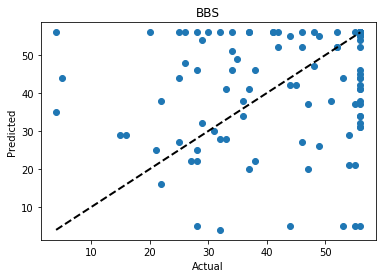

In [153]:
# plot actual vs predicted
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# cross_val_predict on the 120 second data
predicted = cross_val_predict(model, X_bbs, y_bbs, cv=len(X_bbs))

fig, ax = plt.subplots()
ax.scatter(y_bbs, predicted)
ax.plot([y_bbs.min(), y_bbs.max()], [y_bbs.min(), y_bbs.max()], 'k--', lw=2)
plt.title('BBS')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

### Random Forest
<a id="bbs_forest"></a>

In [198]:
# loop for random forest model for BBS score

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

i=0
RMSE = np.zeros(8)
MAE = np.zeros(8)
MAEP = np.zeros(8)
Time = np.zeros(8)
for n in [15, 30, 45, 60, 75, 90, 105, 120]:
    data_filter = data_bbs.query('cutoff ==@n')
    data_filter = data_filter[data_filter.trialtime > n-1]
    
# clinical scores only
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG']]
    
#     # balance features and clinical scores
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
#     # balance features
#     feature_df = data_filter[['f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]

# # general features
#     feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
#        'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
#        'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
#        'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
#        'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
#        'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
#        'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
#        'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
#        'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
#        'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
#        'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
#        'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
#        'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
#        'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
#        'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
#        'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
#        'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
#        'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
#        'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
#        'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
#        'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
#        'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
#        'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
#        'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
#        'SC_Gyr_norm_PSD_kurtosis']]


# general and balance features
    feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
       'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
       'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
       'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
       'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
       'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
       'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
       'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
       'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
       'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
       'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
       'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
       'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
       'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
       'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
       'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
       'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
       'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
       'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
       'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
       'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
       'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
       'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
       'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
       'SC_Gyr_norm_PSD_kurtosis', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
       'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
       'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
    X_bbs = np.asarray(feature_df)
    y_bbs = data_filter['BBS_total'].values.reshape(-1,1)
    
    model = RandomForestRegressor()
    model.fit(X_bbs, y_bbs)
    
    # Cross validation
    # calculate RMSE
    mse_scores = cross_val_score(model, X_bbs, y_bbs,
                        scoring="neg_mean_squared_error", cv=len(X_bbs)) #leave one out cross validation
    rmse_scores = np.sqrt(-mse_scores)
    
    # calculate MAE and MAE Percent
    mae_scores = cross_val_score(model, X_bbs, y_bbs,
                        scoring="neg_mean_absolute_error", cv=len(X_bbs)) #leave one out cross validation
    maep_scores = mae_scores / np.mean(y_bbs)*100
    
    
    def display_scores(scores):
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard Deviation:", scores.std())

    display_scores(rmse_scores)

    RMSE_mean = np.mean(rmse_scores)
    MAE_mean = np.mean(-mae_scores)
    MAEP_mean = np.mean(-maep_scores)
    

    RMSE[i] = RMSE_mean
    MAE[i] = MAE_mean
    MAEP[i] = MAEP_mean
    Time[i] = n
    
    i=i+1
    
    RMSE_forest_data = pd.DataFrame({'Time': Time,
                                  'Model': ['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest'],
                                  'RMSE': RMSE,
                                  'MAE': MAE,
                                 'MAEP': MAEP})
    print(RMSE_forest_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [1.289e+01 8.200e-01 1.069e+01 4.960e+00 1.463e+01 1.505e+01 2.296e+01
 1.801e+01 1.460e+00 1.958e+01 7.090e+00 2.949e+01 5.730e+00 2.238e+01
 1.782e+01 8.570e+00 1.445e+01 1.146e+01 1.905e+01 5.170e+00 8.550e+00
 6.230e+00 1.948e+01 3.690e+00 1.595e+01 1.058e+01 2.060e+00 2.017e+01
 2.806e+01 8.870e+00 1.275e+01 1.557e+01 1.820e+01 3.188e+01 3.840e+00
 4.130e+00 2.580e+00 3.510e+00 6.770e+00 1.402e+01 8.840e+00 4.030e+00
 1.354e+01 2.100e-01 3.240e+00 1.351e+01 7.110e+00 8.030e+00 2.393e+01
 9.700e+00 2.200e-01 7.700e+00 1.080e+00 7.120e+00 4.300e+00 1.050e+00
 2.755e+01 5.870e+00 1.870e+01 4.240e+00 5.610e+00 5.750e+00 1.430e+00
 9.300e-01 9.860e+00 2.586e+01 2.646e+01 2.009e+01 8.100e-01 2.240e+00
 9.300e-01 8.160e+00 1.466e+01 1.543e+01 2.113e+01 9.330e+00 1.730e+00
 7.840e+00 1.945e+01 2.834e+01 2.560e+00 4.480e+00 1.111e+01 5.230e+00
 3.630e+00 2.103e+01 3.331e+01 1.520e+00 1.935e+01 5.200e-01 1.807e+01
 1.083e+01 1.860e+00 8.800e-01 1.270e+01 1.313e+01 1.085e+01 6.180e+0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [1.820e+01 2.880e+00 1.253e+01 5.010e+00 1.856e+01 2.076e+01 1.967e+01
 4.910e+00 1.518e+01 1.779e+01 2.895e+01 4.150e+00 2.302e+01 1.177e+01
 5.600e+00 2.144e+01 2.690e+00 2.456e+01 8.520e+00 9.470e+00 8.170e+00
 1.421e+01 4.780e+00 1.764e+01 1.851e+01 2.260e+00 3.004e+01 2.993e+01
 1.053e+01 2.245e+01 3.308e+01 1.090e+00 1.268e+01 3.400e-01 7.380e+00
 1.380e+00 1.278e+01 3.100e+00 1.850e+00 2.640e+00 5.800e+00 1.926e+01
 6.240e+00 2.580e+00 1.867e+01 2.860e+00 1.053e+01 1.261e+01 8.620e+00
 6.100e+00 7.300e-01 1.161e+01 8.910e+00 1.024e+01 9.710e+00 1.357e+01
 1.101e+01 2.880e+00 2.200e+00 1.392e+01 2.212e+01 2.379e+01 4.330e+00
 8.540e+00 2.490e+00 7.510e+00 7.330e+00 1.790e+01 1.345e+01 1.077e+01
 2.420e+00 1.271e+01 7.910e+00 7.910e+00 7.140e+00 9.270e+00 1.200e-01
 2.600e-01 2.130e+00 3.216e+01 8.000e-01 1.698e+01 1.000e+00 4.970e+00
 6.050e+00 2.210e+00 0.000e+00 3.940e+00 9.810e+00 1.078e+01 4.800e-01
 1.950e+00 1.820e+00 2.500e-01 3.100e-01 8.100e-01 3.890e+00 0.000e+0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [1.430e+00 5.020e+00 7.730e+00 3.049e+01 2.413e+01 7.750e+00 2.063e+01
 1.762e+01 1.604e+01 9.770e+00 2.980e+00 1.590e+01 8.050e+00 2.585e+01
 4.790e+00 1.116e+01 8.070e+00 1.417e+01 1.824e+01 6.750e+00 2.283e+01
 1.295e+01 2.096e+01 2.376e+01 6.780e+00 1.338e+01 4.070e+00 1.596e+01
 3.380e+00 6.640e+00 1.213e+01 2.027e+01 3.330e+00 1.800e-01 8.200e+00
 8.260e+00 1.877e+01 2.750e+00 8.290e+00 2.598e+01 2.600e-01 6.390e+00
 1.341e+01 3.360e+00 3.010e+00 6.500e-01 1.483e+01 2.830e+00 8.310e+00
 5.150e+00 8.830e+00 1.379e+01 7.820e+00 5.250e+00 4.680e+00 1.792e+01
 1.006e+01 7.700e-01 1.130e+00 1.413e+01 6.320e+00 2.915e+01 1.183e+01
 2.550e+00 2.497e+01 1.000e+00 1.606e+01 6.450e+00 5.330e+00 1.960e+00
 3.700e+00 4.500e-01 2.356e+01 5.600e-01 1.820e+01 2.420e+00 2.690e+00
 1.025e+01 3.110e+00 1.230e+00 1.016e+01 1.123e+01 7.110e+00 7.000e-01
 1.930e+00 2.380e+00 1.700e-01 7.130e+00 3.140e+00 5.330e+00 1.700e-01
 1.430e+00 1.550e+00 1.300e-01 2.800e-01 1.820e+00 3.400e-01 6.300e-0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [ 5.16  2.78  7.55 31.22 24.2   3.45 18.07  6.86  7.9   7.99  2.93 19.43
 10.21 14.5   5.34 11.78  4.83 16.98 17.84  7.48 24.73  9.01 12.8  30.27
 14.27 20.81 22.07 18.24  3.05 13.32 10.03  1.9   5.68  1.7   5.85 11.04
  3.08 13.89  1.9   7.64  7.76  0.14  5.22  2.56 15.19  0.83  6.58  3.62
  6.34 12.67  7.8   6.33  8.44 12.23 10.36  1.42  2.58 11.52 11.75 15.04
 28.46  2.75 21.82  6.72 15.83  1.54  5.34  3.92  6.59  0.68 18.28  0.27
 10.84  2.7   5.84  5.02  6.91  2.91  6.55 23.78 10.62  0.93  2.63  1.79
  0.04  9.04  4.06  8.88  0.08  2.03  1.43  0.28  0.42  2.5   0.44  1.17
  0.92  1.21  3.33  0.16  0.45  2.02 19.5   7.91  3.3   0.88  3.74 14.52
  4.19  0.31 15.04  2.68  7.45  8.84  2.04  1.76  8.57  0.57  1.77  1.68]
Mean: 7.85075
Standard Deviation: 7.165017813713608
   Time   Model      RMSE       MAE       MAEP
0  15.0  forest  8.998603  9.264706  23.393984
1  30.0  forest  8.266589  8.693798  21.084790
2  45.0  forest  7.767459  7.849262  18.139989
3  60.0  forest  7.85

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [ 6.9   2.28  4.56 29.92 26.47 11.35 16.72  1.11  8.45  8.64  0.74 23.08
 14.24 14.24  3.1  13.99  2.98 16.81 14.2   6.4  27.95  2.02  8.15 29.46
 12.55 17.41 19.93  8.08  4.45 16.98  5.46  5.61  0.29  2.2   5.97 13.08
  4.32 15.81  3.23  5.13  7.84  0.95  6.01  3.97 14.18  1.04  9.98  4.42
  7.31 14.24  6.13  4.59  8.57  7.15 10.3   1.39  2.53  8.68 10.68  9.01
 23.73  4.93 22.05  4.39 11.36  0.14  8.81  6.97  7.67  1.89 19.55  0.07
 12.93  2.28  4.22  4.47  3.8   1.36 12.07 27.09 15.64  0.45  2.63  1.54
  0.77  9.5   4.69  6.46  0.49  0.8   2.17  0.69  0.8   3.1   0.68  1.27
  0.41  2.63  3.56  0.    0.12  2.09 22.28  7.24  2.61  0.29  2.46 12.05
  5.09  0.13 17.49  5.86  3.47  8.26  2.7   1.27 10.49  0.79  0.76  2.2 ]
Mean: 7.6578333333333335
Standard Deviation: 7.236302599087158
   Time   Model      RMSE       MAE       MAEP
0  15.0  forest  8.998603  9.264706  23.393984
1  30.0  forest  8.266589  8.693798  21.084790
2  45.0  forest  7.767459  7.849262  18.139989
3  60.0  f

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Scores: [ 4.69  1.15  4.28 33.78 28.46  8.76 17.59  0.97  8.67  7.91  0.49 23.92
 11.22 18.92  4.39 10.84  2.09 17.76 10.63  0.46 30.7   4.87 12.29 28.23
 14.87  8.59 23.11  7.57  2.63  6.49  7.9   0.45  1.21  9.64 15.15  5.05
 15.74  3.67  1.33 14.55  3.38  1.4   2.98 15.28  0.82 10.34  3.78  4.67
 15.94  5.67  1.94 11.3   9.19  6.61  2.58  3.95  9.57  8.58 12.01 28.74
 14.35 10.98 11.72  5.57  8.8   6.77  4.76  5.46 18.25  0.25 16.88  1.13
  4.9   5.    2.28  1.32 12.96 25.22 14.51  1.44  2.45  0.47  0.49  9.4
  1.82  8.65  1.32  0.62  2.18  0.68  0.44  3.23  1.26  2.16  1.33  3.99
  3.96  0.    1.22  1.15 16.09  6.32  3.91  0.27  3.93 10.57  6.53  0.15
 15.59  1.87  7.83  8.8   6.46  0.32 17.92  0.83  1.32  2.56]
Mean: 7.799915254237289
Standard Deviation: 7.501924441888309
   Time   Model      RMSE       MAE       MAEP
0  15.0  forest  8.998603  9.264706  23.393984
1  30.0  forest  8.266589  8.693798  21.084790
2  45.0  forest  7.767459  7.849262  18.139989
3  60.0  forest  7.85075

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [1.546e+01 6.290e+00 7.390e+00 3.611e+01 2.664e+01 7.920e+00 1.816e+01
 1.900e+00 1.288e+01 9.550e+00 1.700e-01 2.521e+01 1.482e+01 2.147e+01
 5.070e+00 1.251e+01 4.410e+00 1.493e+01 1.236e+01 2.380e+00 2.700e+01
 3.880e+00 1.488e+01 2.562e+01 8.250e+00 8.480e+00 2.258e+01 1.184e+01
 5.720e+00 9.020e+00 9.500e-01 3.180e+00 1.780e+00 5.670e+00 1.911e+01
 1.920e+00 1.236e+01 2.390e+00 9.100e-01 1.194e+01 3.100e+00 3.280e+00
 3.900e+00 1.672e+01 1.800e-01 5.890e+00 3.720e+00 8.280e+00 1.206e+01
 6.670e+00 3.430e+00 1.111e+01 1.408e+01 1.056e+01 1.370e+00 4.030e+00
 9.050e+00 1.112e+01 1.238e+01 2.886e+01 1.442e+01 6.090e+00 1.147e+01
 5.960e+00 1.101e+01 9.260e+00 5.220e+00 9.750e+00 1.187e+01 5.100e-01
 1.277e+01 5.700e-01 5.150e+00 6.770e+00 4.160e+00 3.880e+00 1.119e+01
 2.054e+01 1.479e+01 4.340e+00 3.480e+00 2.650e+00 5.170e+00 8.080e+00
 5.100e-01 3.620e+00 3.100e-01 6.800e-01 3.240e+00 1.000e+00 2.900e-01
 6.370e+00 3.700e-01 1.210e+00 5.800e-01 8.100e-01 4.820e+00 1.000e-0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [1.395e+01 3.100e+00 8.640e+00 3.480e+01 2.483e+01 7.370e+00 1.909e+01
 2.200e+00 8.470e+00 1.023e+01 1.260e+00 2.449e+01 1.282e+01 2.560e+01
 5.090e+00 7.500e+00 1.020e+00 1.475e+01 1.434e+01 2.460e+00 2.894e+01
 1.760e+00 1.241e+01 2.508e+01 1.113e+01 1.426e+01 2.426e+01 8.100e+00
 4.290e+00 9.830e+00 5.220e+00 1.600e+00 1.610e+00 5.180e+00 2.065e+01
 4.420e+00 9.150e+00 2.330e+00 7.000e-01 1.291e+01 2.960e+00 1.860e+00
 3.980e+00 1.725e+01 8.300e-01 3.840e+00 1.690e+00 9.640e+00 1.457e+01
 6.210e+00 1.190e+00 9.060e+00 1.498e+01 4.550e+00 2.500e+00 1.670e+00
 7.950e+00 1.039e+01 1.265e+01 2.949e+01 2.565e+01 3.600e+00 1.194e+01
 5.640e+00 9.650e+00 4.070e+00 5.790e+00 1.065e+01 1.316e+01 4.200e-01
 1.556e+01 1.230e+00 7.200e+00 6.400e+00 7.850e+00 3.320e+00 8.050e+00
 1.583e+01 1.252e+01 2.800e+00 3.460e+00 1.020e+00 2.560e+00 1.025e+01
 6.700e-01 5.180e+00 6.000e-01 9.300e-01 3.190e+00 1.280e+00 5.400e-01
 6.570e+00 2.000e+00 1.240e+00 8.200e-01 2.960e+00 4.470e+00 1.000e-0

In [199]:
RMSE_forest_data

Time   Model      RMSE       MAE       MAEP
0  15.0   forest  8.998603  9.264706  23.393984
1  30.0   forest  8.266589  8.693798  21.084790
2  45.0   forest  7.767459  7.849262  18.139989
3  60.0   forest  7.850750  7.662250  17.430711
4  75.0   forest  7.657833  7.617417  17.328720
5  90.0   forest  7.799915  7.684915  17.322254
6  105.0  forest  7.935678  8.131949  18.329895
7  120.0  forest  8.045085  8.226610  18.543266

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


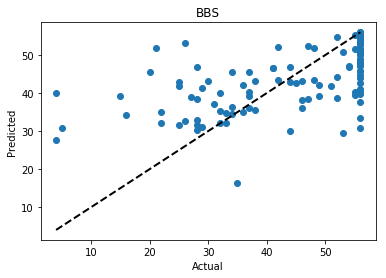

In [200]:
# plot actual vs predicted
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# cross_val_predict on the 120 second data
predicted = cross_val_predict(model, X_bbs, y_bbs, cv=len(X_bbs))

fig, ax = plt.subplots()
ax.scatter(y_bbs, predicted)
ax.plot([y_bbs.min(), y_bbs.max()], [y_bbs.min(), y_bbs.max()], 'k--', lw=2)
plt.title('BBS')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

## Regularization Models

### Ridge Model
<a id="bbs_ridge"></a>

In [201]:
# loop for ridge regression model for BBS score

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

i=0
RMSE = np.zeros(8)
MAE = np.zeros(8)
MAEP = np.zeros(8)
Time = np.zeros(8)
for n in [15, 30, 45, 60, 75, 90, 105, 120]:
    data_filter = data_bbs.query('cutoff ==@n')
    data_filter = data_filter[data_filter.trialtime > n-1]
    
# # clinical scores only
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG']]
    
#     # balance features and clinical scores
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
#     # balance features
#     feature_df = data_filter[['f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]

# general features
    feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
       'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
       'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
       'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
       'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
       'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
       'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
       'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
       'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
       'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
       'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
       'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
       'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
       'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
       'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
       'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
       'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
       'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
       'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
       'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
       'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
       'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
       'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
       'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
       'SC_Gyr_norm_PSD_kurtosis']]


# general and balance features
#     feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
#        'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
#        'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
#        'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
#        'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
#        'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
#        'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
#        'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
#        'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
#        'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
#        'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
#        'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
#        'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
#        'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
#        'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
#        'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
#        'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
#        'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
#        'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
#        'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
#        'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
#        'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
#        'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
#        'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
#        'SC_Gyr_norm_PSD_kurtosis', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#        'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#        'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
    X_bbs = np.asarray(feature_df)
    y_bbs = data_filter['BBS_total'].values.reshape(-1,1)
    
    model = Ridge(alpha=1, solver="cholesky")
    model.fit(X_bbs, y_bbs)
    
    # Cross validation
    # calculate RMSE
    mse_scores = cross_val_score(model, X_bbs, y_bbs,
                        scoring="neg_mean_squared_error", cv=len(X_bbs)) #leave one out cross validation
    rmse_scores = np.sqrt(-mse_scores)
    
    # calculate MAE and MAE Percent
    mae_scores = cross_val_score(model, X_bbs, y_bbs,
                        scoring="neg_mean_absolute_error", cv=len(X_bbs)) #leave one out cross validation
    maep_scores = mae_scores / np.mean(y_bbs)*100
    
    
    def display_scores(scores):
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard Deviation:", scores.std())

    display_scores(rmse_scores)

    RMSE_mean = np.mean(rmse_scores)
    MAE_mean = np.mean(-mae_scores)
    MAEP_mean = np.mean(-maep_scores)
    

    RMSE[i] = RMSE_mean
    MAE[i] = MAE_mean
    MAEP[i] = MAEP_mean
    Time[i] = n
    
    i=i+1
    
    RMSE_ridge_data = pd.DataFrame({'Time': Time,
                                  'Model': ['ridge', 'ridge', 'ridge', 'ridge', 'ridge', 'ridge', 'ridge', 'ridge'],
                                  'RMSE': RMSE,
                                  'MAE': MAE,
                                 'MAEP': MAEP})
    print(RMSE_ridge_data)

Scores: [1.56147008e+00 1.16963831e+01 7.35916489e+00 2.14206151e+01
 3.56307909e+01 8.36237479e+00 4.11672613e+00 2.68265095e+01
 1.19626914e+01 2.70633288e+01 5.37544554e+00 2.91024746e+01
 2.44016649e+00 3.40709678e+01 1.65281236e+01 1.61609322e+01
 1.31742179e+01 2.42021729e+01 3.67546893e+01 4.35276515e+00
 3.15856712e+00 8.08217730e+00 2.21276073e+01 1.01615504e+01
 1.08973826e+01 2.25263825e+01 4.65188854e+00 7.84623431e+00
 4.01128047e+01 1.48736864e+02 1.07210895e+01 1.38938858e+00
 2.71485459e+01 3.15894773e+01 1.51127664e+01 6.12763800e+00
 1.35558678e+01 2.39256838e+00 2.37869957e+01 7.61890838e+00
 2.37348834e+00 1.59428144e+00 7.90907163e+01 1.33973458e+01
 4.91340723e+01 1.68336868e+02 3.90594744e+01 1.39774106e+01
 1.89250906e+01 6.12676758e+00 8.22490334e+00 8.76869861e+00
 1.02394118e+00 1.67945848e+01 2.19406599e+01 2.17128320e+00
 1.85882909e+01 3.54684776e+00 6.95286696e+00 2.86194259e+01
 1.27940754e+01 3.20289094e+00 1.57907113e+00 4.29622355e+01
 1.63828289e+01 

Scores: [7.84938343e-02 1.25212068e+01 1.46444128e+01 4.28718202e+01
 7.37814774e+00 9.68074730e+00 1.47845045e+01 6.99658131e+01
 6.22591325e-01 8.03652525e+00 8.91681967e+00 1.78991744e+01
 9.18947706e+00 3.06960576e+01 8.82055232e-01 2.49363644e+01
 1.72200793e+00 2.02790815e+01 9.33536285e+00 1.13472390e+01
 5.58263695e+00 1.07226981e+01 2.14855886e+01 1.94985732e+00
 2.47761453e+00 2.31773242e+01 1.23946093e-01 1.19013517e+00
 1.34258166e+01 1.23659423e+01 3.20307191e+01 1.66991220e+01
 7.75580547e+00 4.15977436e+00 1.68483122e+01 9.96647592e+01
 5.28884604e+00 6.89745991e-01 1.11513789e+01 4.98370806e+00
 1.14991190e+01 1.81776653e+00 9.85856316e+00 6.39792230e+00
 2.02462078e+01 8.38147565e-01 1.34624592e+00 3.54702177e+00
 5.76546817e+00 1.97425824e+01 3.10218409e+01 2.47920190e+01
 5.07236747e+00 1.87849212e+01 1.07799823e+01 7.15097270e+00
 9.92807968e+00 1.20623470e+01 4.21130160e+00 2.49476479e+01
 2.83815874e+01 1.55678394e+01 2.04810605e+01 1.25471180e+01
 1.55598692e+01 

In [202]:
RMSE_ridge_data

Time  Model       RMSE        MAE       MAEP
0  15.0   ridge  15.746998  15.746998  39.762193
1  30.0   ridge  13.359363  13.359363  32.400034
2  45.0   ridge  12.133815  12.133815  28.041778
3  60.0   ridge  12.272048  12.272048  27.917455
4  75.0   ridge  11.157628  11.157628  25.382282
5  90.0   ridge  13.862674  13.862674  31.247288
6  105.0  ridge  13.537414  13.537414  30.514133
7  120.0  ridge  13.261501  13.261501  29.892208

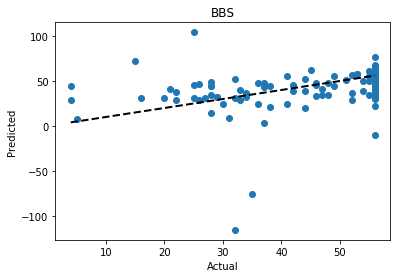

In [203]:
# plot actual vs predicted
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# cross_val_predict on the 120 second data
predicted = cross_val_predict(model, X_bbs, y_bbs, cv=len(X_bbs))

fig, ax = plt.subplots()
ax.scatter(y_bbs, predicted)
ax.plot([y_bbs.min(), y_bbs.max()], [y_bbs.min(), y_bbs.max()], 'k--', lw=2)
plt.title('BBS')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

### Lasso
<a id="bbs_lasso"></a>

In [204]:
# loop for lasso regression model for BBS score

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

i=0
RMSE = np.zeros(8)
MAE = np.zeros(8)
MAEP = np.zeros(8)
Time = np.zeros(8)
for n in [15, 30, 45, 60, 75, 90, 105, 120]:
    data_filter = data_bbs.query('cutoff ==@n')
    data_filter = data_filter[data_filter.trialtime > n-1]
    
#  # clinical scores only
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG']]
    
#     # balance features and clinical scores
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
#     # balance features
#     feature_df = data_filter[['f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]

# general features
    feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
       'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
       'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
       'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
       'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
       'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
       'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
       'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
       'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
       'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
       'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
       'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
       'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
       'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
       'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
       'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
       'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
       'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
       'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
       'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
       'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
       'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
       'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
       'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
       'SC_Gyr_norm_PSD_kurtosis']]


# general and balance features
#     feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
#        'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
#        'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
#        'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
#        'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
#        'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
#        'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
#        'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
#        'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
#        'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
#        'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
#        'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
#        'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
#        'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
#        'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
#        'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
#        'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
#        'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
#        'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
#        'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
#        'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
#        'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
#        'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
#        'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
#        'SC_Gyr_norm_PSD_kurtosis', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#        'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#        'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
    X_bbs = np.asarray(feature_df)
    y_bbs = data_filter['BBS_total'].values.reshape(-1,1)
    
    model = Lasso(alpha=0.1)
    model.fit(X_bbs, y_bbs)
    
    # Cross validation
    # calculate RMSE
    mse_scores = cross_val_score(model, X_bbs, y_bbs,
                        scoring="neg_mean_squared_error", cv=len(X_bbs)) #leave one out cross validation
    rmse_scores = np.sqrt(-mse_scores)
    
    # calculate MAE and MAE Percent
    mae_scores = cross_val_score(model, X_bbs, y_bbs,
                        scoring="neg_mean_absolute_error", cv=len(X_bbs)) #leave one out cross validation
    maep_scores = mae_scores / np.mean(y_bbs)*100
    
    
    def display_scores(scores):
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard Deviation:", scores.std())

    display_scores(rmse_scores)

    RMSE_mean = np.mean(rmse_scores)
    MAE_mean = np.mean(-mae_scores)
    MAEP_mean = np.mean(-maep_scores)
    

    RMSE[i] = RMSE_mean
    MAE[i] = MAE_mean
    MAEP[i] = MAEP_mean
    Time[i] = n
    
    i=i+1
    
    RMSE_lasso_data = pd.DataFrame({'Time': Time,
                                  'Model': ['lasso', 'lasso', 'lasso', 'lasso', 'lasso', 'lasso', 'lasso', 'lasso'],
                                  'RMSE': RMSE,
                                  'MAE': MAE,
                                 'MAEP': MAEP})
    print(RMSE_lasso_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6326.199136719832, tolerance: 4.294055882352941
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6279.66219949596, tolerance: 4.233077037037037
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6302.379200315614, tolerance: 4.28273037037037
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6119.910979875493, tolerance: 4.143933333333333
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6320.321633952362, tolerance: 4.193441481481482
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6290.899948696802, tolerance: 4.280493333333333
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6266.07118737472, tolerance: 4.2669703703703705
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6305.7625633312555, tolerance: 4.2669703703703705
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6260.052837519066, tolerance: 4.2669703703703705
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6309.178543738678, tolerance: 4.173432592592593
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6060.770844207089, tolerance: 4.180303703703704
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6302.803098673454, tolerance: 4.293373333333334
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6317.95326935868, tolerance: 4.290893333333334
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6143.300167804513, tolerance: 4.272573333333334
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6314.290735823551, tolerance: 4.293477037037038
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6220.26802144529, tolerance: 4.2669703703703705
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6316.3880896322025, tolerance: 4.2669703703703705
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5747.3209937610945, tolerance: 4.2669703703703705
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

Scores: [7.62582687e+00 9.78193548e+00 6.33255765e+00 1.96786892e+01
 2.58765939e+01 1.51318670e+01 3.15538356e+00 3.33270855e+01
 9.41101784e+00 2.56730143e+01 1.23355931e-01 3.19564895e+01
 1.05903713e+00 3.22095332e+01 1.86157198e+01 1.40652445e+01
 1.24000558e+01 2.38798416e+01 3.57522449e+01 5.14465966e+00
 4.08127709e+00 1.07958934e+01 2.45838711e+01 7.94802115e+00
 1.04928915e+01 8.63094446e+00 3.68087578e+00 6.16104702e+00
 2.03761690e+01 1.53134322e+02 1.55568685e+01 1.74525265e+00
 2.11071168e+01 2.90384277e+01 1.61888051e+01 1.61607540e+00
 1.29747653e+01 3.74131581e+00 3.15667017e+01 1.25517923e+01
 5.93293907e+00 1.95920884e+00 3.52411257e+01 1.06219227e+01
 3.71795312e+01 1.80741702e+02 3.52626394e+01 8.65190322e+00
 2.22041089e+01 1.48133973e+01 1.18263424e+01 8.67946103e+00
 1.78890382e+00 1.00443299e+01 2.40537247e+01 9.37048578e-01
 1.90197061e+01 2.95668082e+00 1.13898779e+01 2.78203230e+01
 1.43500717e+01 1.75533061e+00 3.15477931e+00 3.88882475e+01
 1.27634055e+01 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5291.747116238874, tolerance: 3.54935
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5454.575467301501, tolerance: 3.5996
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5332.176297294383, tolerance: 3.5967242187500004
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5577.91257385495

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5581.676584809892, tolerance: 3.6126218750000003
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5486.978992954762, tolerance: 3.58142421875
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5488.054921238517, tolerance: 3.577446875
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5501.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5566.2078056042665, tolerance: 3.5967242187500004
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5544.186860049709, tolerance: 3.5967242187500004
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5577.638280584859, tolerance: 3.5967242187500004
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5216.865039346485, tolerance: 3.6147875000000003
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5579.38758218889, tolerance: 3.6186968750000004
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5616.773009379076, tolerance: 3.6134304687500003
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5530.218408140173, tolerance: 3.5967242187500004
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5582.01461860741, tolerance: 3.5967242187500004
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5582.966096901164, tolerance: 3.5967242187500004
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

Scores: [1.63189909e+01 3.80916749e-01 2.45692048e+01 2.77407109e+01
 4.44966693e+01 3.83427285e+00 8.34989530e+00 4.88928260e+00
 1.52217059e+01 2.00769918e+01 2.67208599e+01 1.46899843e+01
 2.39685472e+01 1.83637981e+01 7.19755254e+00 3.14310255e+01
 1.91589784e+01 3.01910939e+01 1.45540991e+00 5.24179693e-01
 1.44928381e+01 1.52238174e+01 8.99456029e+00 1.04589423e+01
 3.26580519e+01 1.82477825e+01 7.93292038e+00 2.75314293e+01
 1.07394787e+01 2.18163724e+01 3.56802339e+01 1.61254893e+01
 3.68966830e+00 1.08478215e+01 7.99553450e+00 1.98909697e+01
 3.10145850e+01 2.32173945e+00 1.54228229e+00 9.61945099e+00
 2.72608181e+00 1.60074791e+02 2.24856321e+01 1.50312767e+00
 1.71100828e+01 1.19292704e+01 7.62463454e+00 1.50468412e+01
 8.62007373e+00 1.59152056e+01 4.46186047e+00 1.84529465e+01
 2.04574732e+00 3.51722248e+00 1.29578236e+01 1.38582924e+01
 4.26805950e-02 7.57641659e+00 2.17803465e+01 1.35407672e+01
 1.71890935e+01 4.19710653e+01 1.63346103e+01 2.08057971e+01
 4.85476873e+00 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3629.4638916896247, tolerance: 2.6441338842975206
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3650.7870455896864, tolerance: 2.6285900826446285
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3611.568365701775, tolerance: 2.670242975206612
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3655.9256059857958, tolerance: 2.670897520661157
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3614.145260414405, tolerance: 2.6285900826446285
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3409.54077950548, tolerance: 2.6242
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3664.3

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3654.5873340469534, tolerance: 2.6578694214876033
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3643.5915522702508, tolerance: 2.6578694214876033
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3637.895725238469, tolerance: 2.6626000000000003
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3574.412329392547, tolerance: 2.6614
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3655.1598486401635, tolerance: 2.665542148760331
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3575.0268303034723, tolerance: 2.6405504132231408
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3639

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3656.045701206248, tolerance: 2.6578694214876037
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3639.80736602667, tolerance: 2.6578694214876037
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3566.7140654092063, tolerance: 2.6578694214876037
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

Scores: [1.44365623e+00 1.20021038e+01 1.74467705e+01 1.92127497e+01
 2.04579215e+00 8.88849805e+00 1.53564863e+01 1.55264579e+01
 1.03123615e+01 2.96498351e+00 1.05219125e+01 3.95872165e+01
 1.52107632e+01 2.55281689e+01 8.12017808e+00 1.27534139e+01
 6.16643616e+00 2.03294044e+01 3.23259260e+01 4.22423593e+00
 8.38912595e+00 5.35363637e+00 8.42907234e+00 1.76380208e+01
 3.46421025e+01 1.91424401e+01 1.04905224e+01 1.65956826e+00
 1.35911954e+01 1.37914224e+01 6.02093419e+00 6.42940667e+00
 8.67531475e+00 2.01400712e+01 9.53684178e-01 1.22941026e+01
 1.66990992e+02 3.76475922e+00 8.79752846e+00 1.76933191e+01
 1.71059897e+01 8.59497277e+00 7.40806690e+00 1.08852557e-01
 1.48143264e+01 5.13801491e+00 1.46662425e+01 6.38059485e+00
 8.60155762e+00 3.45907458e+00 4.45201512e+00 6.93131804e+00
 2.49989548e+00 2.53883174e+01 1.87861743e+01 1.32326455e+01
 1.04181574e+01 6.33070659e+00 7.29352755e+00 2.08421519e+01
 1.71694572e+00 1.05605911e+01 2.65228868e+01 8.56425484e+00
 2.84409632e+01 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3910.3639535182365, tolerance: 2.3276791666666665
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3878.964810768128, tolerance: 2.3051159663865546
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3854.5672779066076, tolerance: 2.322796638655462
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3702.4042710821423, tolerance: 2.301998319327731
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3831.0511632044218, tolerance: 2.326796638655462
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3884.0582091904957, tolerance: 2.3211579831932774
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3903.6075441304733, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3903.0100376728087, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3897.2473146255907, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3906.455030083085, tolerance: 2.317678991596639
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3795.2754285468145, tolerance: 2.301998319327731
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3810.179439771583, tolerance: 2.3155697478991595
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3898.014104364729, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3548.0881904983135, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3963.725515216706, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

Scores: [  3.44392538  12.8674798   17.96936612  29.43323901  20.8681127
   2.89044367  25.33408382  19.0606805    2.93797632  11.4727005
   7.87310077  18.97893627  16.75617724  35.20951662   0.53035285
  24.34547387   2.0865303    9.21361054  20.42855805   6.06906561
   8.10612157  22.81879608  23.74829289   5.75797058  28.43055602
  23.29443108   8.64789499  11.54624992  11.96318326   9.89595594
  43.78715524  17.74176866   9.73878781   3.33906784   6.31705003
 117.60626017  31.635954     7.53750927  18.07241331   5.56687564
  10.92678689   1.86913632  15.57017709   3.83466691  16.72726952
   1.78457949   3.37235212   0.96250806   3.89221457  10.37538707
  15.84579748  19.9888867    5.71410369  96.9071679    9.78543113
   5.69214217  12.13465118  15.39672488   0.7472437   14.75236838
  22.8494564   22.6324942   18.96442588  13.39963036   3.83066033
   6.85646883   8.00143835   7.2207102   15.24247591   1.82431266
   1.07965648   0.42750975  28.70399537   1.3836813    2.35231212
   4

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3537.732654513614, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3639.9202468858894, tolerance: 2.308031932773109
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3614.3137617945094, tolerance: 2.3260319327731094
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3670.9197269048473, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3629.7657009826253, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3399.699337424915, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3334.562138165935, tolerance: 2.1666705882352946
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3653.3599019332496, tolerance: 2.1666705882352946
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3634.4295997629333, tolerance: 2.3227966386554617
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3613.3732103956345, tolerance: 2.301998319327731
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3613.751312970368, tolerance: 2.3251159663865546
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3520.1849952050206, tolerance: 2.279057142857143
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3614.843578212223, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3600.663358687878, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3607.3809804137904, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

Scores: [2.97778306e+00 1.03509496e+01 1.48552420e+01 3.89596535e+01
 7.26812967e+00 7.34200309e+00 1.45895843e+01 6.36180335e+01
 4.55200440e-01 6.44818805e+00 7.29316845e+00 1.85839916e+01
 1.08974803e+01 2.71699706e+01 4.02416971e-01 2.26938029e+01
 1.85375090e+00 2.12382941e+01 1.01553644e+01 9.98664237e+00
 6.64797650e+00 1.21016217e+01 1.57725124e+01 1.75526696e+01
 4.68390317e+00 2.16880292e+01 3.93375986e+00 5.28272739e-01
 8.06477722e+00 1.54829575e+01 2.86740846e+01 1.31811116e+01
 8.90984038e+00 4.53885870e+00 7.71841242e+00 1.07204152e+02
 4.59551834e+00 5.11485769e+00 1.18472915e+01 6.76591393e+00
 1.09383038e+01 1.41692995e+00 1.22086569e+01 5.28654123e+00
 1.83013998e+01 1.56979227e-01 9.55112732e-01 3.98554530e+00
 8.56779720e+00 9.94154827e+00 2.69851830e+01 2.54100821e+01
 1.17586149e+00 1.59984442e+01 8.66804061e+00 6.04331091e+00
 7.01529540e+00 1.43595628e+01 5.08901106e+00 2.34843223e+01
 2.76943175e+01 1.12977650e+01 2.10580439e+01 1.40745253e+01
 1.59706750e+01 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3455.522488128328, tolerance: 2.1970786324786324
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3712.066055069931, tolerance: 2.2094
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3697.7806679298146, tolerance: 2.2048529914529915
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3706

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3786.3903801566303, tolerance: 2.206647863247863
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3717.0831254634727, tolerance: 2.210169230769231
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3653.1058290879187, tolerance: 2.2107196581196584
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3730.2188758658167, tolerance: 2.1970786324786324
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3767.0396085133552, tolerance: 2.1970786324786324
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3749.835856418289, tolerance: 2.186924786324787
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3404.765912060637, tolerance: 2.206647863247863
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3682.585760385257, tolerance: 2.210463247863248
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3561.3523331852844, tolerance: 2.1837247863247864
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3526.5755271167354, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3726.436894575435, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3727.6367720971034, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

Scores: [8.19516942e+00 1.23311067e+01 1.39987404e+01 4.07130989e+01
 1.58700876e+01 1.31957027e+01 1.82468478e+01 5.49075573e+01
 6.56331618e+00 7.54020967e+00 8.11028881e+00 4.19692329e+01
 2.02977724e+01 2.53730565e+01 6.15148890e+00 2.20915860e+01
 9.49124522e-01 2.94222026e+01 9.53372339e+00 1.29064892e+01
 2.43833239e+00 1.29304066e+01 5.93675200e+00 1.17189990e+01
 2.88444516e+01 2.41790870e+01 1.05360373e+01 9.13111101e+00
 1.00621186e+01 6.12785656e+01 7.44125828e+00 1.65712824e+01
 1.48850829e+00 5.28765640e-01 1.69581696e+02 2.61413399e+01
 1.34552393e+01 1.10443462e+01 2.70550721e+00 1.41300778e+01
 4.64965395e+00 9.40279056e+00 4.51210797e+00 2.38581064e+01
 3.79226147e+00 5.75562436e+00 8.18902737e+00 6.45698060e+00
 1.12164039e+01 1.90810097e+01 3.22999301e+01 8.83375472e-01
 1.70141082e+01 1.53192513e+01 2.85440732e+00 5.19565907e+00
 2.37910915e+01 4.81576842e+00 1.66314863e+01 2.34253801e+01
 3.45501557e+01 1.41387791e+01 1.39667033e+01 7.55540904e+00
 7.25740949e+00 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3678.0803291566162, tolerance: 2.176719658119658
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3659.7956033188552, tolerance: 2.160288888888889
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3657.157922077291, tolerance: 2.2052632478632477
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3525.0157827828416, tolerance: 2.176719658119658
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3346.258287557485, tolerance: 2.2052632478632477
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3671.354699838375, tolerance: 2.1803230769230773
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3627.4289735464536, tolerance: 2.1970786324786324
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3650.2490355259656, tolerance: 2.1970786324786324
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3521.0466821911227, tolerance: 2.1970786324786324
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3686.415257585922, tolerance: 2.210463247863248
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3686.889103607127, tolerance: 2.1729145299145305
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3576.857691312723, tolerance: 2.19531452991453
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3660.323191193499, tolerance: 2.1993247863247865
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3665.9341357537505, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3664.7879141200733, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

Scores: [5.19952559e+00 1.07664408e+01 1.39872869e+01 3.41580737e+01
 2.93704508e+01 1.20097594e+00 1.55792666e+01 1.98381933e+01
 3.29387284e+00 6.20520867e+00 8.76894437e+00 4.53768789e+01
 1.90777978e+01 2.92701501e+01 1.26387756e+01 1.71320660e+01
 6.76353930e+00 1.82180098e+01 1.36156894e+01 7.38577296e+00
 2.18656677e+00 1.44648106e+01 8.87352831e+00 1.67340098e+01
 8.65857387e+00 2.21080768e+01 9.77980718e+00 6.61649207e+00
 7.17933814e+00 7.36221222e+01 5.64141536e+00 1.70553240e+01
 7.92743613e+01 1.43863208e+01 8.70667176e+01 1.79490006e+01
 1.98385314e+00 9.23526995e+00 3.47460024e+00 1.83743013e+01
 3.40036296e+00 4.03832621e+00 8.78930386e-01 2.18207473e+01
 4.72675364e+00 9.78146811e-01 1.06948445e+01 2.34166930e+00
 1.56480296e+00 1.94983299e+01 1.68680825e+01 8.43448929e+00
 1.83182088e+01 1.76771776e+01 7.06772791e+00 8.34828311e+00
 2.32107168e+01 2.56110605e+00 1.78358224e+01 2.06554753e+01
 2.15622269e+01 3.96643650e+01 9.21736828e+00 7.18244280e+00
 7.03557344e+00 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3663.4654809128306, tolerance: 2.2052632478632477
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3583.34193399852, tolerance: 2.129591452991453
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3681.9522339158943, tolerance: 2.2036769230769226
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3683.836515692904, tolerance: 2.208565811965812
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3599.714952765072, tolerance: 2.1602888888888887
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3543.746963785551, tolerance: 2.1556769230769226
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3632.037742451327, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3684.3553646435757, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3673.09565589432, tolerance: 2.201369230769231
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3676.482629571214, tolerance: 2.2101692307692304
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3684.5277378247742, tolerance: 2.210463247863248
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3665.994856892135, tolerance: 2.2107196581196584
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

Scores: [  3.42342527  11.42689231  11.73017193  28.22887688  42.66948902
   9.55087577  17.74141023  14.96566978   1.94787025   4.27498165
   6.29662619  49.7486028   18.88387191  28.64785362  13.33396654
  16.90545852   4.26383517  19.48417576   9.66215682   1.24648199
   9.05314817  11.11339288   9.67083129   9.3363846    3.1819187
  25.20620955  11.00393779  17.44187427   7.91499169  79.35050974
   8.68115295  17.57393169 133.91463818   2.03180034 102.66041876
  11.32590411   5.45819858   8.47814075   4.48747393  23.70631595
   3.45699247   2.41923238   0.69076821  18.85847101   4.36347077
   2.3270579    5.9312936    0.83185189   3.64971597  17.45147758
  18.73910111  12.12663394  20.00466124  14.12704634   3.94772246
   3.734119    18.79927044   5.33595917  14.15556118  18.82964136
  21.87841983   9.57962154   6.68402592   6.67005532   5.36723172
   8.76250593   4.42792342   3.47588901   7.59282346   2.51622892
  19.76422381   4.83403334   5.55928636   9.29435857   3.15892846
   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3685.8425487221775, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3682.020379686343, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3673.7393590972047, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

In [205]:
RMSE_lasso_data

Time  Model       RMSE        MAE       MAEP
0  15.0   lasso  15.017885  15.017885  37.921135
1  30.0   lasso  13.067233  13.067233  31.691541
2  45.0   lasso  11.225285  11.225285  25.942124
3  60.0   lasso  12.308331  12.308331  27.999994
4  75.0   lasso  10.620733  10.620733  24.160910
5  90.0   lasso  12.935070  12.935070  29.156413
6  105.0  lasso  12.229957  12.229957  27.567047
7  120.0  lasso  12.616472  12.616472  28.438276

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3676.94703295369, tolerance: 2.186924786324787
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3630.517518541288, tolerance: 2.2052632478632477
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3635.5292628575307, tolerance: 2.210032478632479
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3685.13979848318, tolerance: 2.2048529914529915
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3682.6152393028133, tolerance: 2.203211965811966
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3572.9224835025284, tolerance: 2.1837247863247864
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3686.1407688902545, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3662.443028556336, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3632.037742451327, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

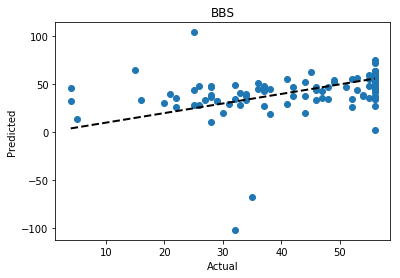

In [206]:
# plot actual vs predicted
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# cross_val_predict on the 120 second data
predicted = cross_val_predict(model, X_bbs, y_bbs, cv=len(X_bbs))

fig, ax = plt.subplots()
ax.scatter(y_bbs, predicted)
ax.plot([y_bbs.min(), y_bbs.max()], [y_bbs.min(), y_bbs.max()], 'k--', lw=2)
plt.title('BBS')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

### Elastic Net
<a id="bbs_enet"></a>

In [207]:
# loop for elastic net model for BBS score

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

i=0
RMSE = np.zeros(8)
MAE = np.zeros(8)
MAEP = np.zeros(8)
Time = np.zeros(8)
for n in [15, 30, 45, 60, 75, 90, 105, 120]:
    data_filter = data_bbs.query('cutoff ==@n')
    data_filter = data_filter[data_filter.trialtime > n-1]
    
# # clinical scores only
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG']]
    
#     # balance features and clinical scores
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
#     # balance features
#     feature_df = data_filter[['f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]

# general features
    feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
       'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
       'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
       'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
       'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
       'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
       'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
       'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
       'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
       'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
       'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
       'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
       'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
       'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
       'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
       'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
       'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
       'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
       'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
       'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
       'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
       'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
       'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
       'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
       'SC_Gyr_norm_PSD_kurtosis']]


# general and balance features
#     feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
#        'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
#        'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
#        'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
#        'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
#        'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
#        'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
#        'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
#        'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
#        'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
#        'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
#        'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
#        'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
#        'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
#        'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
#        'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
#        'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
#        'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
#        'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
#        'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
#        'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
#        'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
#        'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
#        'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
#        'SC_Gyr_norm_PSD_kurtosis', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#        'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#        'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
    X_bbs = np.asarray(feature_df)
    y_bbs = data_filter['BBS_total'].values.reshape(-1,1)
    
    model = ElasticNet(alpha=0.1, l1_ratio=0.5)
    model.fit(X_bbs, y_bbs)
    
    # Cross validation
    # calculate RMSE
    mse_scores = cross_val_score(model, X_bbs, y_bbs,
                        scoring="neg_mean_squared_error", cv=len(X_bbs)) #leave one out cross validation
    rmse_scores = np.sqrt(-mse_scores)
    
    # calculate MAE and MAE Percent
    mae_scores = cross_val_score(model, X_bbs, y_bbs,
                        scoring="neg_mean_absolute_error", cv=len(X_bbs)) #leave one out cross validation
    maep_scores = mae_scores / np.mean(y_bbs)*100
    
    
    def display_scores(scores):
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard Deviation:", scores.std())

    display_scores(rmse_scores)

    RMSE_mean = np.mean(rmse_scores)
    MAE_mean = np.mean(-mae_scores)
    MAEP_mean = np.mean(-maep_scores)
    

    RMSE[i] = RMSE_mean
    MAE[i] = MAE_mean
    MAEP[i] = MAEP_mean
    Time[i] = n
    
    i=i+1
    
    RMSE_enet_data = pd.DataFrame({'Time': Time,
                                  'Model': ['enet', 'enet', 'enet', 'enet', 'enet', 'enet', 'enet', 'enet'],
                                  'RMSE': RMSE,
                                  'MAE': MAE,
                                 'MAEP': MAEP})
    print(RMSE_enet_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6689.529178289348, tolerance: 4.294055882352941
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6696.987755160461, tolerance: 4.233077037037037
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6687.022039265101, tolerance: 4.28273037037037
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6747.270259290768, tolerance: 4.290893333333334
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6462.675222912227, tolerance: 4.143933333333333
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6747.484210739292, tolerance: 4.193441481481482
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6582.604667111483, tolerance: 4.2669703703703705
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6670.462030342099, tolerance: 4.2669703703703705
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6614.253576768154, tolerance: 4.2669703703703705
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6613.757359271675, tolerance: 4.166360000000001
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6760.848866148595, tolerance: 4.173432592592593
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6406.669058011859, tolerance: 4.180303703703704
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6665.585843095145, tolerance: 4.282730370370371
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6564.9722278995305, tolerance: 4.288232592592593
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6671.57461733977, tolerance: 4.290893333333334
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6675.639449056668, tolerance: 4.2669703703703705
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6682.827168631849, tolerance: 4.270173333333334
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6641.17145912422, tolerance: 4.273174814814816
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

Scores: [2.32983997e+00 8.03658318e+00 8.23514374e+00 1.66818701e+01
 2.46884253e+01 1.63743091e+01 4.79707013e+00 3.12605790e+01
 8.78137977e+00 2.59203191e+01 1.70591380e+00 3.21526811e+01
 2.32742567e+00 3.40193536e+01 2.06362755e+01 1.50793904e+01
 8.06681731e+00 2.05703078e+01 3.36854584e+01 1.09807629e+00
 4.74054015e+00 1.45371772e+01 2.75919404e+01 9.44314303e+00
 8.78905705e+00 1.14759281e+00 3.63016038e+00 1.27004286e+01
 7.45527106e+00 1.21850623e+02 9.34701271e+00 2.69532455e+00
 2.28196367e+01 2.95967139e+01 1.20466990e+01 6.24851276e+00
 1.67745355e+01 7.33870946e+00 4.41993384e+01 1.46936047e+01
 1.77689648e+00 1.78769290e+00 2.82139994e+01 1.00028706e+01
 3.59895063e+01 1.71371816e+02 3.69444933e+01 6.38319013e+00
 2.44353433e+01 1.14081053e+01 1.40024708e+01 6.68479105e+00
 2.85091090e+00 9.62574104e+00 2.31890232e+01 6.79943294e-01
 1.74510031e+01 2.81195178e+00 1.15284259e+01 2.71378353e+01
 5.85363716e+00 4.70244053e+00 6.00250778e+00 2.90534298e+01
 6.17605800e+00 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6359.3142697655, tolerance: 3.47899296875
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6550.084287398203, tolerance: 3.58142421875
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6595.457644626559, tolerance: 3.616896875
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6450.6694494

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6422.695074706954, tolerance: 3.47899296875
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6225.428894423464, tolerance: 3.4713875
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6624.7373088165505, tolerance: 3.6010554687500003
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6527.4

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6630.299313890213, tolerance: 3.5967242187500004
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6623.295545315274, tolerance: 3.5967242187500004
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6624.902076074696, tolerance: 3.5967242187500004
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6472.078853576546, tolerance: 3.604746875
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6556.312313307009, tolerance: 3.6126218750000003
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6436.270717677853, tolerance: 3.60701796875
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6016.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6626.0250181482015, tolerance: 3.61793046875
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6631.508789183032, tolerance: 3.6153500000000003
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6631.638893904834, tolerance: 3.6090875000000002
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6604.726500984848, tolerance: 3.6022742187500003
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6538.40146268263, tolerance: 3.5967242187500004
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6427.195080683626, tolerance: 3.5967242187500004
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

Scores: [1.51795264e+01 4.87758240e+00 1.33721784e+01 2.15569011e+01
 5.13574827e+01 1.30332747e+01 7.76292997e+00 4.67342882e+00
 1.69463500e+01 2.61630144e+01 3.82338175e+01 1.09953510e+01
 2.65813132e+01 1.50058772e+01 9.38112002e+00 2.25012293e+01
 1.41509083e+01 3.23290952e+01 3.72753612e+00 8.36421855e+00
 1.03618282e+01 1.84906455e+01 1.25763476e+01 1.37578525e+01
 1.81963912e+01 7.46686288e+00 1.50832463e+01 5.64820209e+01
 1.44899210e+01 2.30409295e+01 4.18899713e+01 1.45677836e+01
 2.70296855e+00 1.58903100e+01 1.20189758e+01 7.99859668e+00
 1.43339598e+01 6.98159502e-01 4.83788168e+00 4.68730263e+00
 2.20309815e+00 2.13265386e+02 2.74017177e+01 7.46433844e+00
 2.43712400e+01 1.26643013e+01 3.20925004e+00 6.11524656e+00
 4.85215181e+00 1.75308147e+01 9.17784275e-01 2.09454142e+01
 1.86332999e+00 2.68698769e+00 9.85071524e+00 9.19744380e+00
 1.14414160e-01 3.04287297e+00 1.49356611e+01 4.74978673e+00
 2.46478675e+01 4.82343626e+01 4.08874869e+00 1.71403803e+01
 7.13158314e+00 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4179.540092402438, tolerance: 2.6665239669421483
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4196.100870281032, tolerance: 2.665542148760331
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4063.0858974506964, tolerance: 2.6578694214876037
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4205.438014008601, tolerance: 2.6702429752066115
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4225.707652687992, tolerance: 2.647515702479339
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4192.78088946301, tolerance: 2.6714066115702484
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4126.042736750032, tolerance: 2.6578694214876033
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4165.363250479269, tolerance: 2.6578694214876033
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4089.307163030893, tolerance: 2.6578694214876033
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4091.6486589320175, tolerance: 2.6614
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4206.220792371647, tolerance: 2.665542148760331
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4062.8760511164082, tolerance: 2.6405504132231408
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4183

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4192.565176299382, tolerance: 2.6578694214876037
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4185.167247619815, tolerance: 2.6578694214876037
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4189.235198326978, tolerance: 2.6578694214876037
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

Scores: [  2.63055599   8.51823593  15.14995179  27.09507032   2.56576184
   4.61397556  16.83623798  47.80840974   2.52046645   1.1336223
   9.10856007  47.86606793  10.78772172  24.01840927   9.17798794
  15.00195723   0.62310347  21.08016388  22.30529904   8.93899831
  32.97270941   7.85011387   8.78265942  28.0268432   37.14030308
  20.27654892   5.85014547   4.00882903   8.33019744  15.62606719
  17.03187913   8.38143178   8.65607537  17.62458123   1.72485219
   0.54607476 162.09433723   7.0243078    9.12579491  24.14944857
  19.08327064   1.37245013   1.50682066   0.64585223  17.97478851
   1.31429866  16.89645781   4.50166178   9.45757321   0.34500677
   2.98727278   6.75614044   1.80007556  24.15177728  13.95786876
  17.7344424    9.88673319  10.28206936   3.04559044  23.53093425
   4.78702716  13.53031103  26.86004      9.0292597   29.62879516
   4.90945694  10.67232964   2.11678673  12.58199225   7.97082576
   9.85068626  19.41095796   6.37389542   2.08566226  22.47165798
   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4137.855578249743, tolerance: 2.3260319327731094
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4179.931580771061, tolerance: 2.174628571428572
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4101.835101917591, tolerance: 2.301998319327731
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4083.4228896400155, tolerance: 2.3240991596638656
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4168.978268534889, tolerance: 2.32729243697479
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4070.4594535397555, tolerance: 2.3276789915966387
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4179.441656773091, tolerance: 2.3175109243697483
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4174.67820913172, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4130.528405479614, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4163.586558922606, tolerance: 2.3051159663865546
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4060.1394587452487, tolerance: 2.313258823529412
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4169.173366423382, tolerance: 2.317678991596639
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4102.696493289238, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4121.404581985758, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4165.027359125798, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

Scores: [  1.20964889  11.48594547  16.36846467  33.66010829  22.70044073
   4.46885353  23.30124151  45.07645267   6.69147983   7.80471823
   9.65058479  12.87557819  16.56300115  32.24128074   2.68663836
  26.61726233   5.3666607   14.5415748   18.50020469   9.03919643
  30.10772032  19.52145387  18.65915242  38.55649441  26.03533953
  23.10788581   9.84697026   5.44227286  11.06350244   0.36253152
  43.66235137  16.39163732  14.28448718   5.5952697    5.49486283
 129.98588854  26.82818617   4.60420235  21.7233582    3.33164195
   4.29194334   0.74173354  17.93766831   2.23533261  16.86747083
   0.44772143   3.40810746   0.86042264   4.51087135  13.07367264
  12.23376005  18.2929835    0.92496014  85.89121886   8.53321298
   8.03549655   7.17463523  18.45004048   1.59042416  16.7790944
  23.72253885  26.61418787  23.29925115  15.51972864   3.46619064
   7.59482701  10.74061767   7.42543756   9.45440543   4.71202886
   0.14532228   1.67651452  22.91189125   1.13431411   4.32115196
   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3859.3453214505025, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4008.0824635385015, tolerance: 2.308031932773109
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4015.881668030871, tolerance: 2.3260319327731094
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3990.647489259615, tolerance: 2.3276789915966387
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4017.3846043745407, tolerance: 2.326746218487395
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3956.2315135168074, tolerance: 2.322678991596639
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3990.9863423332113, tolerance: 2.3130571428571427
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4007.195833857465, tolerance: 2.3051159663865546
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3976.3070499208807, tolerance: 2.322796638655462
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4000.8660834365055, tolerance: 2.2914352941176475
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3888.5052381703654, tolerance: 2.313258823529412
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3911.299116514342, tolerance: 2.3240991596638656
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4004.353867641971, tolerance: 2.313057142857143
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3995.8419838143304, tolerance: 2.313057142857143
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4012.4246431241763, tolerance: 2.313057142857143
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

Scores: [2.60526408e+00 1.02404368e+01 1.66269329e+01 4.24259062e+01
 1.30396871e+01 9.37600578e+00 1.64440510e+01 7.65485058e+01
 4.73199004e+00 4.59769022e+00 7.10829473e+00 1.94658270e+01
 1.17584652e+01 2.53944956e+01 2.79195930e+00 2.52863922e+01
 3.01699290e+00 2.15145032e+01 7.25972238e+00 1.82301463e+00
 2.14374080e+01 1.08006711e+01 1.46662745e+01 1.73304542e+01
 5.98721610e+00 2.04775983e+01 5.56176540e+00 2.16662593e-01
 7.66553401e+00 1.92577911e+01 3.92094227e+01 1.49180853e+01
 1.21341409e+01 4.88484318e+00 1.66136347e+01 1.19443878e+02
 9.43054944e+00 2.34187347e+00 1.51095135e+01 3.99131257e+00
 8.05418944e+00 5.87517520e-01 1.51208141e+01 4.44381799e+00
 1.89236750e+01 2.87365533e+00 8.66388287e-01 6.44607663e+00
 7.00537433e+00 9.77695079e+00 1.95449360e+01 1.84299465e+01
 2.37686840e+00 1.67901238e+01 1.00853524e+01 7.92341675e+00
 6.40974561e+00 1.50539191e+01 4.07734562e+00 2.56733653e+01
 2.66617447e+01 1.40554137e+01 1.89207653e+01 1.46473007e+01
 1.77943096e+01 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3345.119277995369, tolerance: 2.046411965811966
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3813.836474403938, tolerance: 2.046411965811966
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3801.3188168944384, tolerance: 2.2052632478632477
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3812.007901279627, tolerance: 2.210463247863248
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3822.397932017072, tolerance: 2.1837247863247864
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3849.466270833301, tolerance: 2.2095914529914533
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3743.068398040571, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3560.87186528411, tolerance: 2.1993247863247865
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3767.119169546462, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3832.5894130803968, tolerance: 2.1837247863247864
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3857.4755678087186, tolerance: 2.197707692307693
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3851.6416452006074, tolerance: 2.17291452991453
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3585.942476060589, tolerance: 2.1970786324786324
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3727.7515232790274, tolerance: 2.1970786324786324
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3839.0812300050493, tolerance: 2.1970786324786324
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

Scores: [7.79844151e+00 1.11575623e+01 1.44087633e+01 4.05129961e+01
 1.90823768e+01 1.27050403e+01 1.83212700e+01 4.78304161e+01
 3.81652013e+00 7.53571284e+00 7.54267918e+00 3.51670418e+01
 1.87329587e+01 2.38552346e+01 7.30571609e+00 2.15463710e+01
 9.36628991e-02 2.95442985e+01 1.12856299e+01 5.19557021e+00
 1.36487406e+01 1.18549328e+01 7.38923525e+00 3.86536106e+00
 1.89300514e+01 2.13422095e+01 1.35664853e+01 7.73660258e+00
 9.03861260e+00 5.59020921e+01 8.83051955e+00 1.80385689e+01
 2.23947106e+00 1.78688093e+00 1.56573189e+02 2.12260358e+01
 1.38149925e+01 1.23699582e+01 1.89950734e+00 1.01669858e+01
 4.72366161e+00 1.05558108e+01 3.58781357e+00 2.25491610e+01
 6.60143297e+00 6.83409818e+00 8.19713953e+00 6.85497185e+00
 9.71642765e+00 1.70933111e+01 2.12430817e+01 2.65513434e+00
 1.95915147e+01 1.60693013e+01 5.56286459e+00 3.38632895e+00
 2.15293916e+01 5.38896585e+00 1.77151574e+01 2.28810963e+01
 3.55398362e+01 1.46750977e+01 1.44054618e+01 7.00654692e+00
 8.51820228e+00 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3891.37497186295, tolerance: 2.2052632478632477
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3819.8863837705976, tolerance: 2.210032478632479
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3539.86294602191, tolerance: 2.046411965811966
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3907.045637375455, tolerance: 2.210463247863248
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3778.380202385527, tolerance: 2.1837247863247864
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3810.0080283471425, tolerance: 2.2095914529914533
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3862.62180231476, tolerance: 2.1993247863247865
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3895.0402575561657, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3891.36942575332, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3691.5427508169114, tolerance: 2.1953145299145302
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3900.263759383556, tolerance: 2.192719658119658
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3816.163845473884, tolerance: 2.201888888888889
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3910.9881042773322, tolerance: 2.1993247863247865
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3885.7747031162276, tolerance: 2.2013692307692305
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3909.1765390679157, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

Scores: [  5.53717034   7.96608304  15.60240688  36.42663224  31.55492096
   1.9189378   15.58064883  15.29651769   2.02119024   6.74161677
   7.97677413  44.49198695  17.6614768   29.02604074  13.45113015
  19.81677465   7.00570894  19.55905791  13.83766584   2.21793556
  12.22144643  12.53529909   8.53285522  10.93466937   4.54687692
  18.31209764  12.7195228    7.21111165   5.47303866  72.13329401
   7.42857808  14.51164172  95.03280815  14.39088973 103.48463652
   9.8888581    1.33518956   9.7548421    1.80822872  14.29863533
   4.21695998   7.58611659   0.77022745  21.12856081   6.98546998
   0.12100251  10.22244001   6.44206803   3.72103325  15.04089733
  12.80846819   3.32516407  19.95709232  16.12342699   9.89416046
   6.28143283  23.67040953   3.24859623  19.26318884  21.85847672
  18.66338378  76.9259301   12.19309527   8.19747912   8.96804602
   9.91138619   3.13568495   8.35516354  18.73001696   0.10983084
  20.13976339   3.5811981   10.71109107   7.13616171   6.03186257
  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4019.7480736611064, tolerance: 2.2094
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3930.6301503319223, tolerance: 2.2048529914529915
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4076.51461049489, tolerance: 2.1998991452991454
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3980

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4057.132757535732, tolerance: 2.206647863247863
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4044.9818879906084, tolerance: 2.210169230769231
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4038.3118775591574, tolerance: 2.2107196581196584
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4018.8072654259836, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4079.7407742351957, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4081.223533241675, tolerance: 2.201369230769231
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4060.653841488316, tolerance: 2.19531452991453
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4080.1111035461777, tolerance: 2.1998991452991454
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3929.025812507328, tolerance: 2.17291452991453
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4078.9936481229656, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4068.9067544875425, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4067.2116841693933, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

Scores: [  6.04804068   6.70634783  13.35275775  32.84417926  42.98906127
  11.15842562  16.28662234   4.04313483   3.1591881    6.89187851
   6.1582535   48.00533146  18.53466539  31.42300835  14.42292838
  21.59787314   4.50448031  25.1831144    9.96297324   4.02096565
  23.23538607   5.70724561   9.13214697  20.78211619   5.76010183
  23.51228443  15.97242943   6.79712514   5.57343534  85.42168314
   9.36903067  14.15751913 169.7441929    6.40765762 139.51297856
  10.43531654   3.77108434   8.4344436    2.32206462  18.70139509
   4.94711965   6.5002959    0.41506191  18.75406623   5.60953623
   0.61985753   3.2376562    5.13921128   6.95163149  13.92907808
  16.96386231   6.18427229  21.57941955  13.48213095   8.61711362
   3.97630321  22.70312703   3.4933911   15.50675466  20.4817026
  19.59778586  54.3592736    9.27211418   7.64355963  10.5838435
  10.82169448   1.33849388   6.68704924  10.87301362   2.02299275
  16.87643575   5.12010821   4.7680585    8.7898934    6.16636567
   0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4079.6004845440266, tolerance: 2.1970786324786324
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4043.9526143444236, tolerance: 2.1970786324786324
  positive)


In [208]:
RMSE_enet_data

Time Model       RMSE        MAE       MAEP
0  15.0   enet  14.159482  14.159482  35.753611
1  30.0   enet  13.549846  13.549846  32.862007
2  45.0   enet  11.898061  11.898061  27.496940
3  60.0   enet  12.791714  12.791714  29.099634
4  75.0   enet  11.678709  11.678709  26.567680
5  90.0   enet  12.476408  12.476408  28.122563
6  105.0  enet  12.623111  12.623111  28.453240
7  120.0  enet  14.031378  14.031378  31.627556

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4062.982601956611, tolerance: 2.186924786324787
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4063.4016157985216, tolerance: 2.2052632478632477
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4008.351013304654, tolerance: 2.210032478632479
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4019.1347183903117, tolerance: 2.206647863247863
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4065.772705186902, tolerance: 2.210463247863248
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3921.8240669600355, tolerance: 2.1837247863247864
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4053.0783496342065, tolerance: 2.1993247863247865
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4068.2901080178112, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4072.0069445543613, tolerance: 2.197078632478633
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

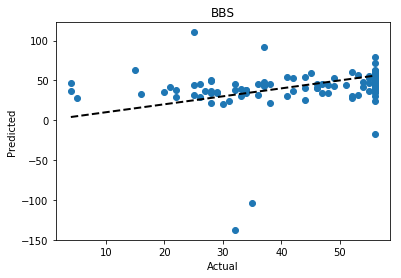

In [209]:
# plot actual vs predicted
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# cross_val_predict on the 120 second data
predicted = cross_val_predict(model, X_bbs, y_bbs, cv=len(X_bbs))

fig, ax = plt.subplots()
ax.scatter(y_bbs, predicted)
ax.plot([y_bbs.min(), y_bbs.max()], [y_bbs.min(), y_bbs.max()], 'k--', lw=2)
plt.title('BBS')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [210]:
# concatenate data frames

modeldata = [RMSE_lin_data, RMSE_forest_data, RMSE_ridge_data, RMSE_lasso_data, RMSE_enet_data]
dfplot = pd.concat(modeldata, sort=False)
dfplot

Time   Model       RMSE        MAE        MAEP
0  15.0   lin     31.703362  31.703362  68.729923 
1  30.0   lin     52.843025  52.843025  111.878944
2  45.0   lin     54.187787  54.187787  114.726068
3  60.0   lin     63.998519  63.998519  135.497291
4  75.0   lin     43.716729  43.716729  92.556805 
5  90.0   lin     53.015063  53.015063  112.243183
6  105.0  lin     35.166631  35.166631  74.454587 
7  120.0  lin     54.344882  54.344882  115.058669
0  15.0   forest  8.998603   9.264706   23.393984 
1  30.0   forest  8.266589   8.693798   21.084790 
2  45.0   forest  7.767459   7.849262   18.139989 
3  60.0   forest  7.850750   7.662250   17.430711 
4  75.0   forest  7.657833   7.617417   17.328720 
5  90.0   forest  7.799915   7.684915   17.322254 
6  105.0  forest  7.935678   8.131949   18.329895 
7  120.0  forest  8.045085   8.226610   18.543266 
0  15.0   ridge   15.746998  15.746998  39.762193 
1  30.0   ridge   13.359363  13.359363  32.400034 
2  45.0   ridge   12.133815  12.133815  28.041778 
3  60.0   ridge   12.272048  12.272048  27.917455 
4  75.0   ridge   11.157628  11.157628  25.382282 
5  90.0   ridge   13.862674  13.862674  31.247288 
6  105.0  ridge   13.537414  13.537414  30.514133 
7  120.0  ridge   13.261501  13.261501  29.892208 
0  15.0   lasso   15.017885  15.017885  37.921135 
1  30.0   lasso   13.067233  13.067233  31.691541 
2  45.0   lasso   11.225285  11.225285  25.942124 
3  60.0   lasso   12.308331  12.308331  27.999994 
4  75.0   lasso   10.620733  10.620733  24.160910 
5  90.0   lasso   12.935070  12.935070  29.156413 
6  105.0  lasso   12.229957  12.229957  27.567047 
7  120.0  lasso   12.616472  12.616472  28.438276 
0  15.0   enet    14.159482  14.159482  35.753611 
1  30.0   enet    13.549846  13.549846  32.862007 
2  45.0   enet    11.898061  11.898061  27.496940 
3  60.0   enet    12.791714  12.791714  29.099634 
4  75.0   enet    11.678709  11.678709  26.567680 
5  90.0   enet    12.476408  12.476408  28.122563 
6  105.0  enet    12.623111  12.623111  28.453240 
7  120.0  enet    14.031378  14.031378  31.627556

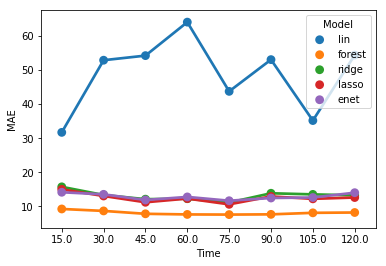

In [211]:
# plot MAE

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plot = sns.pointplot(x="Time", y="MAE",
                      hue="Model",
                      data=dfplot)

### 6MWT

In [220]:
data_6mwt = data_filt.dropna(subset=['6MWT'])
data_6mwt.head()

subject group        dob admission_date        doe  age sex  \
513  CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
514  CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
515  CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
516  CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
517  CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    

                race  height_cm  weight_kg      lifestyle highest_grade  \
513  White/Hispanic   160.0      61.0       Highly-active  20             
514  White/Hispanic   160.0      61.0       Highly-active  20             
515  White/Hispanic   160.0      61.0       Highly-active  20             
516  White/Hispanic   160.0      61.0       Highly-active  20             
517  White/Hispanic   160.0      61.0       Highly-active  20             

    highest_degree  cva_date  cva_to_admission_time lesion_location  \
513  MD, Doctorate  4/9/2018  3.0                    R                
514  MD, Doctorate  4/9/2018  3.0                    R                
515  MD, Doctorate  4/9/2018  3.0                    R                
516  MD, Doctorate  4/9/2018  3.0                    R                
517  MD, Doctorate  4/9/2018  3.0                    R                

    hemiparesis lesion_distribution lesion_location.1  etiology stay_length  \
513  L           BG                  Brainstem         ischemic  17           
514  L           BG                  Brainstem         ischemic  17           
515  L           BG                  Brainstem         ischemic  17           
516  L           BG                  Brainstem         ischemic  17           
517  L           BG                  Brainstem         ischemic  17           

    language_dx_yn voice_dx_severity language_dx cog_comm_dx cog_comm_type  \
513  N              NaN               NaN         Y           Unknown        
514  N              NaN               NaN         Y           Unknown        
515  N              NaN               NaN         Y           Unknown        
516  N              NaN               NaN         Y           Unknown        
517  N              NaN               NaN         Y           Unknown        

    cog_comm_severity dysphagia dysphagia_severity diet_admission  \
513  Mild              N         absent             regular/thin    
514  Mild              N         absent             regular/thin    
515  Mild              N         absent             regular/thin    
516  Mild              N         absent             regular/thin    
517  Mild              N         absent             regular/thin    

    diet_discharge speech_dx_yn  speech_severity  \
513  regular/thin   Y            Mild - Moderate   
514  regular/thin   Y            Mild - Moderate   
515  regular/thin   Y            Mild - Moderate   
516  regular/thin   Y            Mild - Moderate   
517  regular/thin   Y            Mild - Moderate   

                                    speech_dx cardiac_hx afib HTN HLD OSA PVD  \
513  Unilateral upper motor neuron dysarthria  N          0    Y   Y   N   N    
514  Unilateral upper motor neuron dysarthria  N          0    Y   Y   N   N    
515  Unilateral upper motor neuron dysarthria  N          0    Y   Y   N   N    
516  Unilateral upper motor neuron dysarthria  N          0    Y   Y   N   N    
517  Unilateral upper motor neuron dysarthria  N          0    Y   Y   N   N    

    DM other_neuro neuro_specify trach renal druguse_hx movement_disorders  \
513  N  N           NaN           N     N     N          N                   
514  N  N           NaN           N     N     N          N                   
515  N  N           NaN           N     N     N          N                   
516  N  N           NaN           N     N     N          N                   
517  N  N           NaN           N     N     N          N                   

    comorbidities beta_blockers  BBS_total  BBS_subscore      6MWT  10MWT_SSV  \
513  0        

In [222]:
# groupby group and get more summary statistics
data_6mwt_120 = data_6mwt[data_6mwt.cutoff == 120]
data_6mwt_120.groupby(['group', 'session']).agg({
    'subject': ["count"],
    '6MWT': ["count", min, max, "mean", "std"]
})

subject  6MWT                                            
                   count count       min       max        mean         std
group    session                                                          
CONTROLS 1        50      50    409.4480  748.4618  574.242692  82.649302 
CVA      1        41      41    4.1656    461.6450  156.509224  129.587557
         4        45      45    3.9624    562.0512  215.336007  167.423581

In [298]:
# loop for random forest model for BBS score

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

i=0
RMSE = np.zeros(8)
MAE = np.zeros(8)
MAEP = np.zeros(8)
Time = np.zeros(8)
for n in [15, 30, 45, 60, 75, 90, 105, 120]:
    data_filter = data_6mwt.query('cutoff ==@n')
    data_filter = data_filter[data_filter.trialtime > n-1]
    
# clinical scores only
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG']]
    
#     # balance features and clinical scores
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
#     # balance features
#     feature_df = data_filter[['f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]

# # general features
#     feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
#        'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
#        'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
#        'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
#        'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
#        'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
#        'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
#        'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
#        'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
#        'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
#        'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
#        'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
#        'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
#        'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
#        'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
#        'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
#        'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
#        'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
#        'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
#        'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
#        'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
#        'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
#        'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
#        'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
#        'SC_Gyr_norm_PSD_kurtosis']]


# general and balance features
    feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
       'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
       'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
       'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
       'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
       'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
       'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
       'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
       'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
       'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
       'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
       'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
       'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
       'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
       'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
       'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
       'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
       'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
       'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
       'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
       'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
       'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
       'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
       'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
       'SC_Gyr_norm_PSD_kurtosis', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
       'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
       'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
    X_6mwt = np.asarray(feature_df)
    y_6mwt = data_filter['6MWT'].values.reshape(-1,1)
    
    model = RandomForestRegressor()
    model.fit(X_6mwt, y_6mwt)
    
    # Cross validation
    # calculate RMSE
    mse_scores = cross_val_score(model, X_6mwt, y_6mwt,
                        scoring="neg_mean_squared_error", cv=len(X_6mwt)) #leave one out cross validation
    rmse_scores = np.sqrt(-mse_scores)
    
    # calculate MAE and MAE Percent
    mae_scores = cross_val_score(model, X_6mwt, y_6mwt,
                        scoring="neg_mean_absolute_error", cv=len(X_6mwt)) #leave one out cross validation
    maep_scores = mae_scores / np.mean(y_6mwt)*100
    
    
    def display_scores(scores):
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard Deviation:", scores.std())

    display_scores(rmse_scores)

    RMSE_mean = np.mean(rmse_scores)
    MAE_mean = np.mean(-mae_scores)
    MAEP_mean = np.mean(-maep_scores)
    

    RMSE[i] = RMSE_mean
    MAE[i] = MAE_mean
    MAEP[i] = MAEP_mean
    Time[i] = n
    
    i=i+1
    
    RMSE_forest_data = pd.DataFrame({'Time': Time,
                                  'Model': ['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest'],
                                  'RMSE': RMSE,
                                  'MAE': MAE,
                                 'MAEP': MAEP})
    print(RMSE_forest_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [210.41741    97.098104  185.2337164 164.3392192  79.679292  107.4147204
 143.87195   177.02784   182.3447712 189.2766852 198.699628  248.764044
 121.636282   44.023534  189.226952   28.6850328 198.1848716 173.954694
  71.9933536 178.3230876  92.9227504  78.7208484 225.533966  122.639074
  16.999458  150.2430828 216.076276  208.8041036 117.207792  104.574848
  83.681824  202.5161812 344.2742416 159.1768216 122.526044  113.920524
   4.527296  137.444988   38.292278    6.54558   146.701764  125.5889284
  96.0426832 127.617982  191.1821424  92.947998  185.697876  127.1950212
 289.132518   58.893456   44.1178696  46.9886284  44.235116  124.5305612
 110.997746  146.9973692  17.3723808 192.659508  203.956158    3.113278
  39.016178   24.875236   91.318842  207.6611544 244.192552  320.4874972
  83.644232  104.5234892 169.043604  119.862346  248.930668  140.958824
  12.2383296 197.63486    71.5951324 219.045282   89.431876  491.37697
 155.743148  222.2668148  75.311762  221.7789316 113

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [285.665418    7.046976  106.8084224  96.6829664  65.333626   47.3179648
 217.6319244 161.9147892 127.9298432  55.3821092 164.7227592 205.6319992
 125.456188  244.1014168  79.7293808 262.70712   195.394834  144.6576228
  77.8772128  51.7109456  20.7601312 314.898786  250.5568268 151.3079016
 257.1642304 105.772204  151.4720872 171.8434968 273.3171572 208.2035968
 264.0157788  49.7335556  24.685752  329.1895372  59.0122772 200.843642
 130.230372   97.6559388  85.7125032  95.6971924  71.9644992 225.551238
 183.6099452  57.06745   104.120188    5.502148  107.093258  112.7278924
 154.039824  186.532012   69.8844424  14.1314424 217.3434312   4.385056
  96.1535288  89.225374   16.179292  198.1734924 225.5586548 319.9972772
  78.4406356 143.580612  171.9896992  84.3108296 204.7856204  62.2418872
 182.856632   37.256212  215.542114  175.480726  454.1683068 120.852946
  53.77815    44.980606   97.6638128  52.6567908  60.075064  142.749524
 141.65326   175.1247196 211.8799928   4.4731432

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [188.08446   164.222938   76.0765052  67.4392352  20.0484232 160.292288
  12.458192  155.5274512 257.372612   48.854614  256.299462    9.125204
 213.16823   205.0866612 136.0461084 212.6514416   3.1242    128.3706348
 232.072688   33.941512  113.345468  218.6899868 107.921298  229.3466076
 183.6901584 320.4867352 289.57524   247.762268   41.3102552  15.519654
 220.394276   85.932518  125.42393   199.438768  173.7239096  46.4060032
  56.115712   92.541852  241.3186944 121.8325732  50.391314  115.661948
   2.973324  128.542542   88.2726708 142.5508452 132.1541172  37.412422
  82.5003176 158.551372   68.3943768  56.3497984  16.09852   225.2661992
 103.3681448 393.1388632 160.9640164 150.3069892 302.3391972  43.226736
 204.5484352  53.5677364 124.615702   85.923882  192.07988   162.411664
 435.2593276 119.5832    138.5644676 103.29037     5.9413648  92.2544256
  80.633316  163.61156   148.0021424 312.7180436 243.0408144   2.1971508
  11.984228    0.498602   12.309094   97.983802   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [148.4021924  92.9132    130.9862252  32.511492   36.508944  125.8062
  28.748228  161.0853776 239.98682     6.2536324 236.290358    3.1782512
 321.488054  193.6717488 188.7005116 199.3554052  72.581516  138.6118132
 210.121246  154.118564   71.505064  213.8241088  21.4466424 228.7903476
 120.6701676 297.919394  243.5856952 160.912048  136.8141536   2.9972
 189.536832   97.71634   191.31534   234.1165752 119.8526432  60.6864928
  83.5842372  58.963306  213.9643676  71.444104   18.99031   159.9378056
  44.5727328 137.87247   170.7470804 172.7242672 165.6842     16.3214812
  12.2828812 120.0119012  66.33591    65.428622   37.4104408 159.713422
 171.468542  324.541896  399.2038752 215.712548  295.983406   48.290226
 218.156028   96.0596504  90.9316952   9.365742  207.7362876 180.999384
 396.1565356 106.161586   47.871634  107.9945008  61.157358   84.1502
  80.1710868 147.485354  170.7282336 291.9186948 188.997082   23.5091732
  19.71929    17.087088   43.942254    7.933944   26.36

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [1.16970200e+02 1.20303087e+02 2.36161326e+02 2.57197860e+01
 1.55953968e+02 1.25766322e+02 4.01439380e+01 1.66446708e+02
 2.93311072e+02 5.16126984e+01 1.87213342e+02 7.34167696e+01
 3.08554730e+02 1.63213136e+02 2.25401226e+02 2.19695522e+02
 1.66025576e+02 7.03485512e+01 1.28233170e+02 1.36912096e+02
 5.63824120e+01 1.26216461e+02 4.98718332e+01 1.96661532e+02
 7.37651052e+01 3.77650197e+02 1.54660600e+02 1.14426035e+02
 9.73309204e+01 1.46982180e+01 1.96070728e+02 1.10012226e+02
 1.77929540e+02 2.66644628e+02 7.24875360e+01 9.33264072e+01
 7.12668120e+01 6.32025660e+01 1.69785538e+02 6.89295040e+01
 8.51092532e+01 2.79530048e+02 1.14565684e+01 8.00511480e+00
 9.35140624e+01 1.75180041e+02 1.80713888e+02 2.01394060e+01
 2.37184692e+01 1.42441930e+02 8.00211252e+01 7.61987300e+01
 6.26913148e+01 1.32910326e+02 1.41638528e+02 3.07229256e+02
 3.06129639e+02 3.21114420e+02 2.81144472e+02 4.37370220e+01
 1.35610600e+02 6.71596320e+01 1.67006981e+02 1.43032480e+00
 2.73034760e+02 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [161.6723716 120.834912  210.2880732  33.060132  197.96633    93.917262
  26.805636  131.9050956 262.019796   65.29578   224.5744048  34.7054932
 225.9186236 113.019078  213.8098848 161.50844   156.788866   59.1742276
 122.091704   80.5561     71.45909    83.3424292  51.0219452 199.5357452
  98.6137728 178.16322   140.1939284 178.7190228  20.177506  286.2326
 130.076194  174.7254824 333.579724   73.047606   14.255496    4.949698
  87.6304572 174.282862  193.1192988 167.3640036 200.229724   23.7226348
  21.2282532 113.8924316 221.7034428 154.6142704 115.769644   23.8006128
 242.00104   131.0123364  96.739964  104.2927048 107.54995    90.608658
 184.608216  267.4152132 331.940916   55.841138  242.312444  166.481252
 211.816188  137.353294  231.30256    71.259446  374.74525    96.741234
 173.914816   34.5443556 119.8372     82.217768   79.51724   106.4400716
 178.7498584 277.779226  294.332152    3.2863028  16.299942   73.7256844
   6.888988    9.015476   98.513392   87.92972     

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [155.0357072 116.4069808 149.39645    52.747164  154.636978  168.813734
  50.98669   177.2401332 259.558536   39.2961368 323.968872   10.8368592
 227.5592604 169.7987968 112.5723936 169.21226   181.1728152  38.939216
 103.692706   86.631018   78.750414  102.5248648  52.2251432 197.464172
  93.9057812 171.472352  179.5551908 135.8750648  69.483986  266.182602
 149.722586  147.4957172 306.619148   65.728342   24.459692   24.21001
  85.268308  187.094368  221.7027824 127.5394452 200.4471988  46.0280004
  12.267438  144.604994  183.1694584 182.5025052  88.720422   48.658526
 205.44536   129.019808   40.22344   105.564432  166.5357096 101.589332
 247.226328  317.5817372 328.42327   162.435794  227.074476  103.7221192
 202.8915932 120.751854  270.48841    44.86148   364.880144  120.5936628
 257.37566    33.3094584  92.385134   92.9749728 115.6152628 178.5527036
 159.7112376 240.409476  351.744026   14.3683736  52.089812   50.1174004
 128.2173204  33.143444  102.284022  115.184682    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [159.2428616 137.4308656  60.1067632  46.611794  143.9926    118.8676312
  25.817322  160.7931252 211.603082    1.6618204 304.124106   35.4445316
 195.155058  183.7296808 147.8961736 146.501612  205.7739852  45.5858372
 126.096776   55.1454828  72.314562  237.7415108 102.4202676  95.267272
  99.1355904 161.356294  195.65366    87.3301276 117.136164  313.8268044
 122.155966  128.136396  261.323836   76.3955292  21.462746   11.41222
  86.191852  158.2566812 167.5830532 110.1487256 241.9539992  78.392782
   3.8449504 131.2979848 255.0834624 221.685612  105.739184   29.533596
 233.3233332  64.344042  100.7662704  46.24451   176.722532   88.061038
 222.4142872 336.78495   440.29757   198.62165   212.16366   100.48494
 197.880986  123.65609   263.912604   38.727888  322.114418  121.823226
 138.935206   54.0249872 166.162736   27.9999948 165.626288  218.9316424
 139.7932688 262.621522  233.776266    2.0936712  81.614264   82.890106
  90.608404   43.750484  127.1853184  79.056738   15.

In [299]:
RMSE_forest_data

Time   Model        RMSE         MAE       MAEP
0  15.0   forest  130.070014  128.704811  36.624822
1  30.0   forest  124.232017  123.817231  33.866393
2  45.0   forest  122.710091  120.938810  32.056945
3  60.0   forest  123.251567  125.116791  33.164392
4  75.0   forest  127.397669  127.233421  33.725441
5  90.0   forest  125.656727  123.884906  32.337605
6  105.0  forest  129.373127  129.720184  33.860785
7  120.0  forest  131.064752  131.039160  34.205076

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

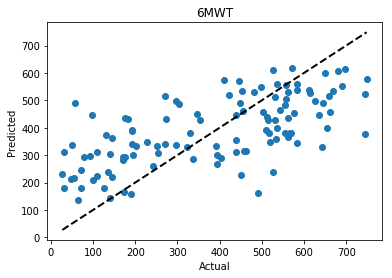

In [300]:
# plot actual vs predicted
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# cross_val_predict on the 120 second data
predicted = cross_val_predict(model, X_6mwt, y_6mwt, cv=len(X_6mwt))

fig, ax = plt.subplots()
ax.scatter(y_6mwt, predicted)
ax.plot([y_6mwt.min(), y_6mwt.max()], [y_6mwt.min(), y_6mwt.max()], 'k--', lw=2)
plt.title('6MWT')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

### 10MWT

In [301]:
data_10mwt = data_filt.dropna(subset=['10MWT_SSV'])
data_10mwt.shape

(1107, 165)

In [302]:
# groupby group and get more summary statistics
data_10mwt_120 = data_10mwt[data_10mwt.cutoff == 120]
data_10mwt_120.groupby(['group', 'session']).agg({
    'subject': ["count"],
    '10MWT_SSV': ["count", min, max, "mean", "std"]
})

subject 10MWT_SSV                                        
                   count     count       min       max      mean       std
group    session                                                          
CONTROLS 1        49      49        0.891266  2.367424  1.454797  0.268919
CVA      1        37      37        0.051865  1.275781  0.531291  0.371527
         4        37      37        0.064999  1.457372  0.672531  0.402078

In [303]:
# loop for random forest model for BBS score

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

i=0
RMSE = np.zeros(8)
MAE = np.zeros(8)
MAEP = np.zeros(8)
Time = np.zeros(8)
for n in [15, 30, 45, 60, 75, 90, 105, 120]:
    data_filter = data_10mwt.query('cutoff ==@n')
    data_filter = data_filter[data_filter.trialtime > n-1]
    
# clinical scores only
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG']]
    
#     # balance features and clinical scores
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
#     # balance features
#     feature_df = data_filter[['f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]

# # general features
#     feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
#        'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
#        'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
#        'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
#        'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
#        'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
#        'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
#        'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
#        'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
#        'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
#        'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
#        'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
#        'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
#        'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
#        'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
#        'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
#        'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
#        'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
#        'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
#        'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
#        'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
#        'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
#        'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
#        'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
#        'SC_Gyr_norm_PSD_kurtosis']]


# general and balance features
    feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
       'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
       'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
       'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
       'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
       'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
       'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
       'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
       'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
       'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
       'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
       'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
       'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
       'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
       'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
       'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
       'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
       'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
       'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
       'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
       'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
       'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
       'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
       'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
       'SC_Gyr_norm_PSD_kurtosis', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
       'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
       'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
    X_10mwt = np.asarray(feature_df)
    y_10mwt = data_filter['10MWT_SSV'].values.reshape(-1,1)
    
    model = RandomForestRegressor()
    model.fit(X_10mwt, y_10mwt)
    
    # Cross validation
    # calculate RMSE
    mse_scores = cross_val_score(model, X_10mwt, y_10mwt,
                        scoring="neg_mean_squared_error", cv=len(X_10mwt)) #leave one out cross validation
    rmse_scores = np.sqrt(-mse_scores)
    
    # calculate MAE and MAE Percent
    mae_scores = cross_val_score(model, X_10mwt, y_10mwt,
                        scoring="neg_mean_absolute_error", cv=len(X_10mwt)) #leave one out cross validation
    maep_scores = mae_scores / np.mean(y_10mwt)*100
    
    
    def display_scores(scores):
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard Deviation:", scores.std())

    display_scores(rmse_scores)

    RMSE_mean = np.mean(rmse_scores)
    MAE_mean = np.mean(-mae_scores)
    MAEP_mean = np.mean(-maep_scores)
    

    RMSE[i] = RMSE_mean
    MAE[i] = MAE_mean
    MAEP[i] = MAEP_mean
    Time[i] = n
    
    i=i+1
    
    RMSE_forest_data = pd.DataFrame({'Time': Time,
                                  'Model': ['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest'],
                                  'RMSE': RMSE,
                                  'MAE': MAE,
                                 'MAEP': MAEP})
    print(RMSE_forest_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [0.52049021 0.17109573 0.35240835 0.11495667 0.41561005 0.22092419
 0.33648202 0.41666952 0.46965018 0.50384906 0.19274716 0.37884925
 0.3199068  0.02855504 0.43192949 0.16845045 0.49944801 0.03420023
 0.53013139 0.14646861 0.48533263 0.39265611 0.27455501 0.47973162
 0.71026561 0.1807108  0.39324975 0.37379412 0.71194006 0.76596683
 0.01270484 0.21370557 0.3225868  0.20463957 0.44114417 0.02073364
 0.13743496 0.35583617 0.17854218 0.39813247 0.52608459 0.49130549
 0.67866764 0.21848883 0.32815372 0.13883446 0.35168456 0.40948335
 0.27607    0.28664808 0.15928318 0.63275563 0.38021826 0.14063849
 0.09594596 0.39076065 0.41258723 0.68616389 1.02412791 0.26080087
 0.38998782 0.56945521 0.16072937 0.72410381 0.37340369 0.0216499
 0.4903527  0.13161409 0.60288667 1.18631119 0.50418587 0.2132645
 0.86455701 0.05144757 0.06261272 0.28097217 0.29282972 0.42810311
 0.19289182 0.3781694  0.19132747 0.24532433 0.13931989 0.33267566
 0.30778977 0.19955945 0.34943562 0.10783483 0.28507268 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [0.85131474 0.25532153 0.34335389 0.22586407 0.08188192 0.11953369
 0.47351707 0.46416731 0.44787248 0.05308976 0.45727148 0.51823993
 0.24842046 0.60543802 0.11977959 0.60021716 0.05533676 0.34356529
 0.26884389 0.63005333 0.46558255 0.75660665 0.12682285 0.62140496
 0.26702211 0.56790083 0.72917062 0.23671796 0.27872698 0.05239798
 0.92482896 0.10694887 0.63762293 0.29641075 0.1663895  0.18116288
 0.71122809 0.51734433 0.21572544 0.26057185 0.24318969 0.01852625
 0.5121682  0.46893749 0.43849209 0.00744456 0.00883923 0.35495367
 0.05633157 0.18966538 0.24201327 0.19588058 0.63795129 0.94217842
 0.24704216 0.39777359 0.44408505 0.18150514 0.23987068 0.20678939
 0.32338164 0.01551    0.64743089 1.17626618 0.27948215 0.28353697
 0.85961998 0.11394687 0.05018011 0.1946854  0.15364056 0.02324331
 0.15474153 0.21292097 0.11794806 0.1546139  0.12761673 0.35888483
 0.03873359 0.24092103 0.25684019 0.08913855 0.0951264  0.0103534
 1.0539172  0.2708977  0.12666571 0.00703366 0.00324068

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [0.5731847  0.2955511  0.51719894 0.50654249 0.06815018 0.06665211
 0.43692181 0.22321157 0.28422574 0.73395386 0.03599991 0.55198686
 0.06704786 0.48056404 0.03957483 0.11945567 0.10619281 0.39252014
 0.10464951 0.70410306 0.09006451 0.76000382 0.31358658 0.82242627
 0.74734613 0.13454744 0.23261189 0.19712174 0.54761769 0.0848028
 0.35909725 0.37946834 0.11887143 0.02435268 0.52594018 0.32924241
 0.32338138 0.29078093 0.03453758 0.01942601 0.51802525 0.37534388
 0.40136291 0.07791542 0.09182673 0.01502583 0.1909601  0.10777837
 0.24333159 0.31536663 0.34738582 0.97002523 0.42894119 0.49035649
 0.72773563 0.01474671 0.4238021  0.07896953 0.41175856 0.0801392
 0.5912455  1.16462736 0.26244916 0.33504045 0.68707744 0.05001035
 0.0045393  0.25619151 0.02297604 0.64722527 0.29208211 0.19331318
 0.26193883 0.13334211 0.08728006 0.31024511 0.18080865 0.36223927
 0.16172654 0.10449866 0.16161841 0.03136792 0.91329175 0.26470693
 0.06418045 0.09864726 0.04511773 0.49047008 0.40175696 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [0.31362149 0.24403857 0.30202438 0.43362426 0.09324518 0.14462958
 0.23872139 0.1764578  0.37278008 0.79870482 0.14196495 0.50444865
 0.11665411 0.69884373 0.15157886 0.03903292 0.02914362 0.61467226
 0.13018393 0.68788787 0.18906344 0.77440615 0.40949442 0.82827191
 0.63576303 0.07389226 0.30968673 0.21661516 0.44255609 0.16696827
 0.58415813 0.53010553 0.08049265 0.08168764 0.65782916 0.38089908
 0.18620517 0.39567184 0.04666027 0.15806509 0.56122601 0.5011046
 0.4621782  0.02255139 0.05051392 0.01949641 0.56314836 0.07350817
 0.23112117 0.25447678 0.42730433 0.85078775 0.922681   0.66714292
 0.80694761 0.02838676 0.55573835 0.11757045 0.17712401 0.12317497
 0.48269889 1.11407614 0.32181464 0.48306339 0.6901776  0.03079461
 0.22207926 0.43773139 0.08616882 0.59862072 0.30183783 0.1100926
 0.3475103  0.15005544 0.12424421 0.12174912 0.04497652 0.19777845
 0.20255796 0.13681579 0.08659007 0.04558178 0.98507161 0.31762863
 0.06064067 0.02057078 0.08181282 0.46307002 0.27143382 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [3.50755456e-01 4.15500909e-01 4.02692769e-01 7.16288713e-01
 1.26606438e-02 2.46105224e-01 3.37232245e-01 2.10184881e-01
 3.13785104e-01 7.17545920e-01 8.96552716e-02 4.27723468e-01
 1.24139409e-02 6.58975123e-01 2.96554015e-01 4.66188719e-02
 1.65725613e-01 3.93034697e-01 1.41030606e-01 4.90482171e-01
 1.68864340e-01 5.84462337e-01 2.23028829e-01 9.52663103e-01
 5.16302187e-01 4.61863118e-02 3.17785358e-01 2.81256389e-01
 4.65657909e-01 2.60858350e-01 1.99810120e-01 6.59467626e-01
 1.85984472e-01 2.12370416e-02 4.85147672e-01 3.73224703e-01
 2.48370295e-01 5.09907879e-01 1.57392154e-01 2.05998353e-02
 4.71277824e-01 4.07880091e-01 3.86899050e-01 8.44906638e-02
 5.21422478e-02 5.73963676e-02 4.76880863e-01 1.49652142e-01
 3.24476180e-01 3.01085048e-01 1.61302856e-01 5.45897730e-01
 9.24383838e-01 8.81061944e-01 6.60759909e-01 1.28277145e-01
 2.33547198e-01 9.95119837e-02 3.29708190e-01 3.81950438e-02
 6.39932947e-01 1.22548594e+00 3.26591801e-01 4.21460464e-01
 7.04356837e-01 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [0.37762807 0.35741904 0.47868279 0.67109226 0.03809959 0.49652789
 0.2831384  0.16096236 0.21898827 0.72427628 0.256243   0.42489103
 0.13399206 0.4280764  0.1735258  0.25506903 0.17597699 0.22692525
 0.18024792 0.49591018 0.17643549 0.69372419 0.23149596 0.66426932
 0.04297791 0.32103982 0.19057844 0.51253132 0.14775029 0.21591849
 0.6696259  0.16908654 0.02461632 0.48326271 0.4686387  0.33631762
 0.41056631 0.13059483 0.08322523 0.56566696 0.4387001  0.3747491
 0.01515524 0.05932049 0.15136885 0.80275672 0.1532327  0.25893339
 0.15321938 0.37466729 0.45363172 0.89124833 0.94555874 0.11212287
 0.34150898 0.24819198 0.34274192 0.41331717 0.69926325 1.00614877
 0.29830668 0.32101791 0.7023809  0.03186721 0.03501297 0.21516743
 0.18673495 0.44917942 0.51560115 0.26583854 0.2185755  0.16693781
 0.05063814 0.08190388 0.15731414 0.46217766 0.2340268  0.06679667
 0.12690917 0.04121933 0.97574886 0.33894008 0.02891725 0.05949984
 0.09803781 0.2971665  0.36417071 0.23644146 0.06083821

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [0.38456948 0.36225018 0.48121726 0.50334957 0.03577715 0.33332288
 0.40480361 0.19354735 0.35154872 0.6598759  0.24434035 0.58818667
 0.0448263  0.53694608 0.02480398 0.24225569 0.07256611 0.27725782
 0.26448066 0.51530854 0.2912172  0.75954237 0.21705172 0.50464299
 0.10002033 0.2916629  0.02599293 0.45004593 0.19559069 0.29154652
 0.43004427 0.11815612 0.01207047 0.52535394 0.49383297 0.38195288
 0.41706219 0.31958632 0.14809932 0.69828564 0.51267364 0.2584636
 0.14566471 0.09641681 0.14014613 0.72094394 0.11831359 0.30187128
 0.25815891 0.27290264 0.48557483 0.65569402 0.82327248 0.32436866
 0.26408022 0.2676243  0.46905519 0.40161029 0.81558456 0.98506938
 0.31309973 0.30901107 0.79094946 0.03678015 0.03961601 0.48925158
 0.16104284 0.47143659 0.53682299 0.1457803  0.2900084  0.3101397
 0.38674903 0.08657105 0.04633051 0.47992048 0.28035441 0.19028608
 0.09508889 0.03471089 0.96876524 0.443959   0.00344009 0.03922519
 0.07878431 0.43179791 0.35896737 0.16630047 0.03648591 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [0.40006319 0.3549538  0.45576955 0.40196495 0.0505429  0.34395465
 0.229464   0.18657205 0.22524797 0.73146843 0.30133677 0.6678228
 0.10593278 0.49961932 0.15430833 0.22975788 0.23151982 0.22306679
 0.20454598 0.6707066  0.36796195 0.45783053 0.30616322 0.54086898
 0.12435955 0.30961502 0.03943107 0.46338583 0.17438783 0.30770575
 0.43514588 0.13349081 0.02549717 0.49967101 0.41401331 0.40007759
 0.46346173 0.23981013 0.21844    0.57082567 0.55251204 0.43158705
 0.05249612 0.05696319 0.27612771 0.51526092 0.13275716 0.23771307
 0.25339808 0.17883548 0.62332664 0.7468862  1.12564134 0.41722027
 0.40387447 0.20510042 0.46711558 0.39958485 0.73553042 0.90634983
 0.31263678 0.30386483 0.77888141 0.03683501 0.25481554 0.56973899
 0.13710053 0.48851042 0.41353447 0.14302952 0.21655022 0.15725373
 0.21812257 0.12387571 0.03154435 0.48669108 0.28971987 0.17418452
 0.08302828 0.10786809 1.03547712 0.48894206 0.07193876 0.10059417
 0.08995019 0.4161681  0.42048782 0.18229567 0.02746517

In [304]:
RMSE_forest_data

Time   Model      RMSE       MAE       MAEP
0  15.0   forest  0.335466  0.333286  34.205593
1  30.0   forest  0.316292  0.323434  32.428009
2  45.0   forest  0.302334  0.299950  29.635493
3  60.0   forest  0.314246  0.326655  32.273965
4  75.0   forest  0.310059  0.324765  32.087216
5  90.0   forest  0.310756  0.308737  30.014903
6  105.0  forest  0.320255  0.327320  31.821522
7  120.0  forest  0.325715  0.336592  32.722932

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

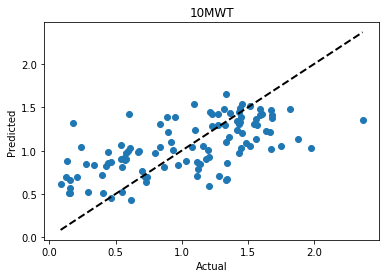

In [305]:
# plot actual vs predicted
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# cross_val_predict on the 120 second data
predicted = cross_val_predict(model, X_10mwt, y_10mwt, cv=len(X_10mwt))

fig, ax = plt.subplots()
ax.scatter(y_10mwt, predicted)
ax.plot([y_10mwt.min(), y_10mwt.max()], [y_10mwt.min(), y_10mwt.max()], 'k--', lw=2)
plt.title('10MWT')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

### TUG

In [238]:
data_tug = data_filt.dropna(subset=['TUG'])
data_tug.shape

(1035, 164)

In [239]:
# groupby group and get more summary statistics
data_tug_120 = data_tug[data_tug.cutoff == 120]
data_tug_120.groupby(['group', 'session']).agg({
    'subject': ["count"],
    'TUG': ["count", min, max, "mean", "std"]
})

subject   TUG                                       
                   count count    min       max       mean        std
group    session                                                     
CONTROLS 1        50      50    4.553  15.4740   8.179480   2.452155 
CVA      1        28      28    8.354  314.2730  41.225179  59.773763
         4        37      37    6.742  83.2245   24.995027  18.648216

In [306]:
# loop for random forest model for TUG score

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

i=0
RMSE = np.zeros(8)
MAE = np.zeros(8)
MAEP = np.zeros(8)
Time = np.zeros(8)
for n in [15, 30, 45, 60, 75, 90, 105, 120]:
    data_filter = data_tug.query('cutoff ==@n')
    data_filter = data_filter[data_filter.trialtime > n-1]
    
# clinical scores only
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG']]
    
#     # balance features and clinical scores
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
#     # balance features
#     feature_df = data_filter[['f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]

# # general features
#     feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
#        'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
#        'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
#        'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
#        'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
#        'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
#        'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
#        'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
#        'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
#        'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
#        'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
#        'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
#        'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
#        'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
#        'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
#        'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
#        'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
#        'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
#        'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
#        'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
#        'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
#        'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
#        'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
#        'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
#        'SC_Gyr_norm_PSD_kurtosis']]


# general and balance features
    feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
       'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
       'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
       'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
       'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
       'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
       'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
       'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
       'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
       'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
       'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
       'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
       'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
       'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
       'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
       'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
       'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
       'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
       'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
       'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
       'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
       'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
       'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
       'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
       'SC_Gyr_norm_PSD_kurtosis', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
       'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
       'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
    X_tug = np.asarray(feature_df)
    y_tug = data_filter['TUG'].values.reshape(-1,1)
    
    model = RandomForestRegressor()
    model.fit(X_tug, y_tug)
    
    # Cross validation
    # calculate RMSE
    mse_scores = cross_val_score(model, X_tug, y_tug,
                        scoring="neg_mean_squared_error", cv=len(X_tug)) #leave one out cross validation
    rmse_scores = np.sqrt(-mse_scores)
    
    # calculate MAE and MAE Percent
    mae_scores = cross_val_score(model, X_tug, y_tug,
                        scoring="neg_mean_absolute_error", cv=len(X_tug)) #leave one out cross validation
    maep_scores = mae_scores / np.mean(y_tug)*100
    
    
    def display_scores(scores):
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard Deviation:", scores.std())

    display_scores(rmse_scores)

    RMSE_mean = np.mean(rmse_scores)
    MAE_mean = np.mean(-mae_scores)
    MAEP_mean = np.mean(-maep_scores)
    

    RMSE[i] = RMSE_mean
    MAE[i] = MAE_mean
    MAEP[i] = MAEP_mean
    Time[i] = n
    
    i=i+1
    
    RMSE_forest_data = pd.DataFrame({'Time': Time,
                                  'Model': ['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest'],
                                  'RMSE': RMSE,
                                  'MAE': MAE,
                                 'MAEP': MAEP})
    print(RMSE_forest_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [14.211995 12.25574  19.621095 19.85461  21.197545  8.1608   26.241025
  2.40141  10.19581   3.44238  58.40717  19.0387   13.259095  7.91876
 19.65843  22.03609  16.79792   4.90768   7.145685  2.317125  3.789195
 12.2571    8.032085 18.62093   9.69904   3.97243   9.698205 16.19459
  4.52667   7.852535  2.09237  26.671925  9.025425 25.2784    7.674205
  2.565785  3.138345 23.930335 15.0677   22.628615 30.64584   7.18567
  7.807435  3.284805  7.092815  7.29843  10.419485  7.66705   2.307835
 12.09181  10.81617  19.60386  20.359735  9.84674  44.720685  7.37918
  6.974695  1.481585 13.530215  1.11575   3.06163  14.55944  10.63478
  7.57137   0.78793   3.62764   7.8868    0.15913   5.485215  5.91453
  6.50051   4.680635  9.17016   4.9012   10.67963   4.11459   1.877695
  1.631345  6.62      3.090445  0.77903   2.608125  8.22474   0.628985
  3.60039   2.3317    5.21228   0.1924    1.573575  1.98671   0.3249
  1.561885  1.650925  1.06399   7.25276  15.41462   1.164005  2.91219
  4.698

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [4.0892200e+00 1.4314300e+01 1.2987785e+01 1.9995360e+01 1.3907660e+01
 2.0725140e+01 9.2003500e+00 1.2973840e+01 1.1342820e+01 6.0585420e+01
 2.3508865e+01 1.5050335e+01 9.2988900e+00 2.1017510e+01 2.7148420e+01
 2.3578095e+01 6.0549600e+00 8.5313650e+00 7.5012600e+00 1.3044560e+01
 1.6179020e+01 9.2651050e+00 7.5395900e+00 9.5394850e+00 1.9865100e+01
 1.2361130e+01 1.4908610e+01 8.7160100e+00 3.2467405e+01 2.9721800e+00
 2.1579925e+01 5.9411700e+00 1.4809000e-01 6.5363300e+00 1.9676970e+01
 1.7602100e+01 3.2267510e+01 1.6678030e+01 8.4099200e+00 5.2897100e+00
 2.9780950e+00 1.2488590e+01 1.2994650e+00 4.7733300e+00 6.2243250e+00
 3.9070500e-01 1.6675210e+01 9.0204250e+00 1.8713830e+01 7.4652300e+00
 1.4540420e+01 3.7884330e+01 2.1792320e+01 9.3776900e+00 1.0229950e+00
 1.5697050e+00 2.2315450e+00 1.1082050e+00 1.8617600e+00 9.6520900e+00
 5.5826050e+00 2.4957900e+00 3.3269000e+00 5.8570200e+00 3.5775000e-01
 5.4705600e+00 3.0058200e+00 4.8238100e+00 4.7075000e-01 9.6506700e+0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [2.5580800e+00 2.1980210e+01 8.2605050e+00 2.0508495e+01 1.0260040e+01
 7.4865450e+00 1.7352755e+01 1.0410505e+01 6.2844700e+01 6.7939800e+00
 2.3836615e+01 1.3779535e+01 1.4607985e+01 2.3297590e+01 2.4630545e+01
 9.2408150e+00 2.0070900e+00 1.2962250e+01 1.2012135e+01 7.8351600e+00
 5.5827750e+00 4.6981800e+00 1.9305105e+01 1.4865230e+01 7.2816200e+00
 5.5969600e+00 1.1574950e+00 3.9321335e+01 9.0047950e+00 2.1097750e+00
 4.9006500e+00 4.7858400e+00 1.4227185e+01 1.1968720e+01 2.0723865e+01
 2.3804415e+01 1.6381980e+01 1.5567805e+01 2.5418550e+00 3.9420900e+00
 1.5698315e+01 5.0598550e+00 4.4704650e+00 2.7350900e+00 1.5617680e+01
 2.1226225e+01 4.0749150e+00 1.1061220e+01 2.5575700e+00 1.9302230e+01
 4.0419675e+01 1.6912500e-01 4.9314750e+00 2.7904900e+00 3.1989600e+00
 7.2862000e-01 2.0727150e+00 4.8451650e+00 1.0663650e+01 1.8566950e+00
 1.2208000e+00 4.1503000e+00 5.3658400e+00 1.0421100e+00 5.1495400e+00
 3.8088250e+00 6.4403950e+00 2.7682000e+00 8.1609900e+00 2.7415100e+0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [1.5406150e+00 1.3175490e+01 5.9915000e+00 1.9685700e+01 1.8022850e+00
 5.7203500e-01 1.9959965e+01 2.5698500e-01 6.1108540e+01 2.8628350e+00
 1.4239990e+01 1.0085180e+01 1.5072335e+01 2.4275635e+01 2.2911895e+01
 9.6080100e+00 1.0969300e+00 6.8564000e+00 5.2197200e+00 1.8575065e+01
 1.1539330e+01 1.3436000e+01 2.7048050e+00 1.3615205e+01 9.9393150e+00
 9.0834700e+00 3.8462350e+00 3.5995815e+01 1.1118850e+01 6.0585000e+00
 1.1879600e+00 2.8547750e+00 1.1945050e+01 1.0512355e+01 2.0435900e+01
 2.0122410e+01 1.7175825e+01 1.5710305e+01 2.3480450e+00 2.8731450e+00
 1.0909300e+01 1.0934105e+01 5.2630300e+00 6.4216500e+00 1.8988745e+01
 1.6098700e+00 5.8657550e+00 1.4798525e+01 7.7375350e+00 2.9649915e+01
 4.3335125e+01 2.8712505e+01 1.1103200e+01 2.2694600e+00 5.1680850e+00
 2.6396500e-01 2.3554800e+00 2.4560750e+00 9.4237600e+00 2.1881000e+00
 1.0473000e-01 3.3796100e+00 4.6069900e+00 1.1256800e+00 7.6172450e+00
 3.1193450e+00 7.2141750e+00 5.9711050e+00 7.0757750e+00 1.6447600e+0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [1.1028750e+00 1.5509890e+01 2.4135350e+00 1.4418970e+01 2.9851700e+00
 1.1061200e+00 1.1045790e+01 7.5210500e-01 6.4504150e+01 7.5709100e+00
 1.4782075e+01 4.7695450e+00 1.3276450e+01 1.8894530e+01 2.2445850e+01
 1.1157080e+01 2.0876050e+00 2.3093100e+00 7.7321650e+00 2.6301755e+01
 1.1090830e+01 6.9930800e+00 2.2585000e-02 1.1612070e+01 9.0847050e+00
 1.2235480e+01 5.9635850e+00 3.5931615e+01 1.1100240e+01 2.1617500e+00
 4.7290500e+00 2.8979500e+00 9.4712850e+00 1.3260360e+01 1.8251815e+01
 2.0952425e+01 1.5105615e+01 1.4165930e+01 2.6394750e+00 2.4360850e+00
 1.1249845e+01 1.2009065e+01 2.5776050e+00 1.2850915e+01 1.7114840e+01
 3.4171950e+00 5.2677900e+00 1.4208275e+01 6.7969500e+00 2.8908155e+01
 5.2004825e+01 2.6005955e+01 4.2199500e+00 1.2343250e+00 6.3832000e-01
 2.7354350e+00 1.7823100e+00 4.5590150e+00 1.0950395e+01 1.2012450e+00
 7.0795000e-01 3.3200900e+00 5.0931200e+00 8.3070000e-01 7.3216600e+00
 3.5087850e+00 7.8213950e+00 1.1003400e+01 1.2696850e+01 1.3304400e+0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [5.1455000e-02 1.5920190e+01 6.5724000e-01 1.6032775e+01 7.5824000e-01
 4.6189750e+00 6.8664200e+00 1.5932550e+00 6.3911870e+01 6.2066350e+00
 1.5746910e+01 7.4219750e+00 1.3807780e+01 1.9302205e+01 2.0709660e+01
 9.2645400e+00 1.9859300e+00 5.5805400e+00 9.9458450e+00 2.2168410e+01
 8.2397350e+00 1.0856970e+01 1.5502050e+00 2.0758755e+01 7.2409300e+00
 7.7259150e+00 3.1648450e+00 3.4903460e+01 1.6574475e+01 4.4395000e-02
 1.1784450e+00 5.4016850e+00 1.8249945e+01 1.4659130e+01 1.9230685e+01
 2.6536365e+01 1.8202805e+01 1.1938980e+01 3.7836000e+00 4.2238750e+00
 9.9430800e+00 1.3231910e+01 6.7638950e+00 1.4217730e+01 1.7904505e+01
 6.3304900e+00 5.7142750e+00 1.4713570e+01 2.6874865e+01 3.2503385e+01
 4.8478475e+01 6.0861100e+00 7.8678350e+00 3.5188700e+00 4.8835000e-01
 2.9414450e+00 1.1030750e+00 3.3834800e+00 1.1909475e+01 2.0742100e+00
 6.6580900e+00 4.2152400e+00 6.9825650e+00 7.8462000e-01 6.9685400e+00
 2.7546600e+00 6.7600900e+00 1.3632300e+01 1.1739070e+01 5.5926400e+0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [ 9.36028  14.07014   1.88705  14.710125  6.113915  4.139685  9.358155
  1.06145  60.36122   5.75082  15.515575  8.90784  15.244215 20.135365
 13.278465 11.23442   6.0341    6.021815  9.106295 25.046385  4.97372
 12.939185  0.484735 22.546275  9.212885  7.882115  4.94462  32.046345
 17.512735  1.11412   1.126775  0.946425 13.20912  12.63993  16.6689
 29.311165 20.02759  11.191125  1.926595  4.231695 16.01475  13.10253
  3.78767  12.972265 13.14885   2.79824   5.33531  11.75047  22.37401
 29.22768  49.282785  4.7912    7.983875  1.874565  1.49579   3.74429
  2.94104   9.644015 13.098395  1.81778   3.42743   2.48791   6.05936
  1.148055  7.02382   2.9994    5.39591  12.754225 18.00161   3.600695
  5.43978   2.75322   4.67498   1.574355  0.9619    4.47446   1.09533
  1.47459   5.19753   0.09526   3.37951   0.77571   2.28124   0.62834
  0.81743   2.340455  0.086095  2.04878   0.458255  1.21933  11.770305
  2.52075   0.399265  1.86485   4.80853   4.119395  8.545325  0.790365
 17.746

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [ 6.549045 18.028     4.034605 17.50726   9.6574    3.315895  7.96416
  7.07618  59.95744   7.54842  13.972885  8.36719   9.60055  21.006135
 20.565275 10.29281   4.94803   0.633835 12.795055 19.03215   6.338405
 15.306705  1.378425 19.98199   5.805925  8.2487    2.912585 32.67867
 20.85859   1.28893   1.252325  5.717545 13.11648  13.342105 20.303625
 22.138845 18.430205 10.708025  2.16656   2.24921  14.53695  11.20535
  5.860435 19.529985 16.20302   8.600115  7.301025 11.69693   8.890895
 32.395255 58.252725  7.013955  5.91886   3.72811   1.91151   2.870625
  1.16327   5.91036   7.8895    1.63064   2.2698    3.86125   9.521255
  0.40806  15.15433   3.60865   9.01147   9.13183  10.15853  10.418505
  6.85028   2.20194   4.82587   3.87783   1.65208   5.53329   0.95033
  1.15936  11.783805  0.448395  4.40683   4.17965   2.85827   1.78796
  0.08577   2.32157   4.863265  1.7219    0.67817   0.58915  11.01351
  2.44049   3.72688   1.82146   4.04833   7.954095  8.75197   1.66142
 13.1

In [307]:
RMSE_forest_data

Time   Model      RMSE       MAE       MAEP
0  15.0   forest  8.823206  8.945915  50.698099
1  30.0   forest  8.772979  8.531437  48.642742
2  45.0   forest  7.967462  7.735406  44.859813
3  60.0   forest  7.962448  7.971576  46.229430
4  75.0   forest  7.977867  8.229127  47.723041
5  90.0   forest  8.385269  8.357622  48.468223
6  105.0  forest  8.324736  8.453660  49.025173
7  120.0  forest  9.113743  9.229407  53.523946

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

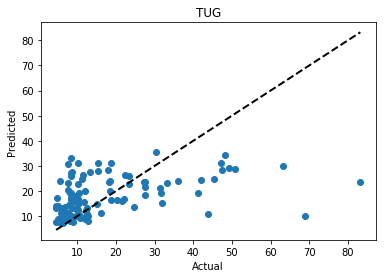

In [308]:
# plot actual vs predicted
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# cross_val_predict on the 120 second data
predicted = cross_val_predict(model, X_tug, y_tug, cv=len(X_tug))

fig, ax = plt.subplots()
ax.scatter(y_tug, predicted)
ax.plot([y_tug.min(), y_tug.max()], [y_tug.min(), y_tug.max()], 'k--', lw=2)
plt.title('TUG')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

### FIM

In [294]:
# not in the right format
# add a FIM column, if session = 1, FIM = FIM_admission, if session = 4, FIM = FIM_discharge

import numpy as np

data_filt['FIM'] = ""
data_filt['FIM'] = np.where((data_filt['session'] == 1), #Identifies the case to apply to
                           data_filt['FIM_admission'],      #This is the value that is inserted
                           data_filt['FIM'])      #This is the column that is affected
data_filt['FIM'] = np.where((data_filt['session'] == 4), #For rows with column1 > 90
                           data_filt['FIM_discharge'],      #We place column3 values
                           data_filt['FIM'])  #In column two
data_filt.head(50)


subject group        dob admission_date        doe  age sex  \
9     CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
10    CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
11    CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
12    CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
13    CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
14    CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
15    CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
16    CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
17    CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
387   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
388   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
389   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
390   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
391   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
392   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
393   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
394   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
395   CVA01   CVA   7/21/1954  4/5/2018       4/11/2018  63   F    
513   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
514   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
515   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
516   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
517   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
518   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
519   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
520   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
521   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
891   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
892   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
893   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
894   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
895   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
896   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
897   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
898   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
899   CVA02   CVA   9/16/1955  4/12/2018      4/16/2018  62   F    
1017  CVA03   CVA   5/21/1960  4/19/2018      4/25/2018  57   F    
1018  CVA03   CVA   5/21/1960  4/19/2018      4/25/2018  57   F    
1019  CVA03   CVA   5/21/1960  4/19/2018      4/25/2018  57   F    
1020  CVA03   CVA   5/21/1960  4/19/2018      4/25/2018  57   F    
1021  CVA03   CVA   5/21/1960  4/19/2018      4/25/2018  57   F    
1022  CVA03   CVA   5/21/1960  4/19/2018      4/25/2018  57   F    
1023  CVA03   CVA   5/21/1960  4/19/2018      4/25/2018  57   F    
1024  CVA03   CVA   5/21/1960  4/19/2018      4/25/2018  57   F    
1025  CVA03   CVA   5/21/1960  4/19/2018      4/25/2018  57   F    
1395  CVA03   CVA   5/21/1960  4/19/2018      4/25/2018  57   F    
1396  CVA03   CVA   5/21/1960  4/19/2018      4/25/2018  57   F    
1397  CVA03   CVA   5/21/1960  4/19/2018      4/25/2018  57   F    
1398  CVA03   CVA   5/21/1960  4/19/2018      4/25/2018  57   F    
1399  CVA03   CVA   5/21/1960  4/19/2018      4/25/2018  57   F    

                     race  height_cm  weight_kg      lifestyle highest_grade  \
9     White/Non-Hispanic   172.72     62.2       Sedentary      12             
10    White/Non-Hispanic   172.72     62.2       Sedentary      12             
11    White/Non-Hispanic   172.72     62.2       Sedentary      12             
12    White/Non-Hispanic   172.72     62.2       Sedentary      12             
13    White/Non-Hispanic   172.72     62.2       Sedentary      12             
14    White/Non-Hispanic   172.72     62.2       Sedenta

In [285]:
data_fim = data_filt.dropna(subset=['FIM'])
data_fim['FIM'] = pd.to_numeric(data_fim['FIM'])
data_fim['FIM']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


9        49.0 
10       49.0 
11       49.0 
12       49.0 
13       49.0 
14       49.0 
15       49.0 
16       49.0 
17       49.0 
387      85.0 
388      85.0 
389      85.0 
390      85.0 
391      85.0 
392      85.0 
393      85.0 
394      85.0 
395      85.0 
513      85.0 
514      85.0 
515      85.0 
516      85.0 
517      85.0 
518      85.0 
519      85.0 
520      85.0 
521      85.0 
891      109.0
892      109.0
893      109.0
894      109.0
895      109.0
896      109.0
897      109.0
898      109.0
899      109.0
1017     29.0 
1018     29.0 
1019     29.0 
1020     29.0 
1021     29.0 
1022     29.0 
1023     29.0 
1024     29.0 
1025     29.0 
1395     71.0 
1396     71.0 
1397     71.0 
1398     71.0 
1399     71.0 
1400     71.0 
1401     71.0 
1402     71.0 
1403     71.0 
1521     44.0 
1522     44.0 
1523     44.0 
1524     44.0 
1525     44.0 
1526     44.0 
1527     44.0 
1528     44.0 
1529     44.0 
1899     73.0 
1900     73.0 
1901     73.0 
1902     7

In [286]:
# groupby group and get more summary statistics
data_fim_120 = data_fim[data_fim.cutoff == 120]
data_fim_120.groupby(['group', 'session']).agg({
    'subject': ["count"],
    'FIM': ["count", min, max, "mean", "std"]
})

subject   FIM                                   
                count count   min    max       mean        std
group session                                                 
CVA   1        50      50    17.0  98.0   58.760000  19.417602
      4        48      48    42.0  120.0  84.604167  18.828159

In [312]:
# loop for random forest model for FIM score

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

i=0
RMSE = np.zeros(8)
MAE = np.zeros(8)
MAEP = np.zeros(8)
Time = np.zeros(8)
for n in [15, 30, 45, 60, 75, 90, 105, 120]:
    data_filter = data_fim.query('cutoff ==@n')
    data_filter = data_filter[data_filter.trialtime > n-1]
    
# clinical scores only
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG']]
    
#     # balance features and clinical scores
#     data_filter = data_filter.dropna(subset=['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG'])
#     feature_df = data_filter[['6MWT', '10MWT_SSV', '10MWT_FV', 'TUG', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
#     # balance features
#     feature_df = data_filter[['f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
#         'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
#         'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]

# # general features
#     feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
#        'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
#        'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
#        'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
#        'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
#        'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
#        'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
#        'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
#        'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
#        'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
#        'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
#        'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
#        'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
#        'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
#        'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
#        'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
#        'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
#        'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
#        'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
#        'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
#        'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
#        'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
#        'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
#        'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
#        'SC_Gyr_norm_PSD_kurtosis']]


# general and balance features
    feature_df = data_filter[['SC_Gyr_x_mean', 'SC_Gyr_y_mean',
       'SC_Gyr_z_mean', 'SC_Gyr_norm_mean', 'SC_Gyr_x_range', 'SC_Gyr_y_range',
       'SC_Gyr_z_range', 'SC_Gyr_norm_range', 'SC_Gyr_x_rms', 'SC_Gyr_y_rms',
       'SC_Gyr_z_rms', 'SC_Gyr_norm_rms', 'SC_Gyr_x_std', 'SC_Gyr_y_std',
       'SC_Gyr_z_std', 'SC_Gyr_norm_std', 'SC_Gyr_x_skew', 'SC_Gyr_y_skew',
       'SC_Gyr_z_skew', 'SC_Gyr_norm_skew', 'SC_Gyr_x_kurtosis',
       'SC_Gyr_y_kurtosis', 'SC_Gyr_z_kurtosis', 'SC_Gyr_norm_kurtosis',
       'dSC_Gyr_x_mean', 'dSC_Gyr_y_mean', 'dSC_Gyr_z_mean',
       'dSC_Gyr_norm_mean', 'dSC_Gyr_x_range', 'dSC_Gyr_y_range',
       'dSC_Gyr_z_range', 'dSC_Gyr_norm_range', 'dSC_Gyr_x_rms',
       'dSC_Gyr_y_rms', 'dSC_Gyr_norm_rms', 'dSC_Gyr_x_std', 'dSC_Gyr_y_std', 'dSC_Gyr_z_std',
       'dSC_Gyr_norm_std', 'dSC_Gyr_x_skew', 'dSC_Gyr_y_skew',
       'dSC_Gyr_z_skew', 'dSC_Gyr_norm_skew', 'dSC_Gyr_x_kurtosis',
       'dSC_Gyr_y_kurtosis', 'dSC_Gyr_z_kurtosis', 'dSC_Gyr_norm_kurtosis',
       'SC_Gyr_corr_xy', 'SC_Gyr_corr_xz', 'SC_Gyr_corr_yz', 'SC_Gyr_x_SamEn',
       'SC_Gyr_y_SamEn', 'SC_Gyr_z_SamEn', 'SC_Gyr_norm_SamEn',
       'SC_Gyr_x_DAmp', 'SC_Gyr_x_DFreq', 'SC_Gyr_x_PSD_mean',
       'SC_Gyr_x_PSD_std', 'SC_Gyr_x_PSD_skew', 'SC_Gyr_x_PSD_kurtosis',
       'SC_Gyr_y_DAmp', 'SC_Gyr_y_DFreq', 'SC_Gyr_y_PSD_mean',
       'SC_Gyr_y_PSD_std', 'SC_Gyr_y_PSD_skew', 'SC_Gyr_y_PSD_kurtosis',
       'SC_Gyr_z_DAmp', 'SC_Gyr_z_DFreq', 'SC_Gyr_z_PSD_mean',
       'SC_Gyr_z_PSD_std', 'SC_Gyr_z_PSD_skew', 'SC_Gyr_z_PSD_kurtosis',
       'SC_Gyr_norm_DAmp', 'SC_Gyr_norm_DFreq', 'SC_Gyr_norm_PSD_mean',
       'SC_Gyr_norm_PSD_std', 'SC_Gyr_norm_PSD_skew',
       'SC_Gyr_norm_PSD_kurtosis', 'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP',
       'spectral_centroid_AP', 'max_accAP', 'max_accML', 'mean_accAP', 'mean_accML', 'rms_AP',
       'rms_ML', 'jerk_AP', 'jerk_ML', 'mean_velAP', 'mean_velML']]
    
    X_fim = np.asarray(feature_df)
    y_fim = data_filter['FIM'].values.reshape(-1,1)
    
    model = RandomForestRegressor()
    model.fit(X_fim, y_fim)
    
    # Cross validation
    # calculate RMSE
    mse_scores = cross_val_score(model, X_fim, y_fim,
                        scoring="neg_mean_squared_error", cv=len(X_fim)) #leave one out cross validation
    rmse_scores = np.sqrt(-mse_scores)
    
    # calculate MAE and MAE Percent
    mae_scores = cross_val_score(model, X_fim, y_fim,
                        scoring="neg_mean_absolute_error", cv=len(X_fim)) #leave one out cross validation
    maep_scores = mae_scores / np.mean(y_tug)*100
    
    
    def display_scores(scores):
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard Deviation:", scores.std())

    display_scores(rmse_scores)

    RMSE_mean = np.mean(rmse_scores)
    MAE_mean = np.mean(-mae_scores)
    MAEP_mean = np.mean(-maep_scores)
    

    RMSE[i] = RMSE_mean
    MAE[i] = MAE_mean
    MAEP[i] = MAEP_mean
    Time[i] = n
    
    i=i+1
    
    RMSE_forest_data = pd.DataFrame({'Time': Time,
                                  'Model': ['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest'],
                                  'RMSE': RMSE,
                                  'MAE': MAE,
                                 'MAEP': MAEP})
    print(RMSE_forest_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [ 8.24  4.   10.64  7.76 21.82 19.45 11.69  6.6   3.43  6.53  8.13 20.77
 11.93 39.01 23.17  5.9   9.18 24.55 10.21 20.44 23.68 11.48 22.   19.51
  4.1  20.38  0.43 12.05 10.76 20.21  7.02  9.4  14.53 31.8   4.68 24.77
 14.31 15.15  6.16 23.71 18.36 22.6  24.41  0.59 10.56  3.22 18.92 21.54
 38.02  7.46  3.49  4.09  8.1   0.64  9.16  8.18 37.39  2.88 30.01 18.97
 10.61  0.36  8.41 15.51 16.52 23.33 17.02 22.06 36.48 33.11  8.85  8.32
 18.42  3.34  2.04  0.96  6.48  3.88  5.62  2.29  4.88  4.12 23.84  5.12
  9.22 42.97]
Mean: 13.859651162790701
Standard Deviation: 10.154362958236963
   Time   Model       RMSE        MAE       MAEP
0  15.0  forest  13.859651  14.052442  81.494095
1  0.0   forest  0.000000   0.000000   0.000000 
2  0.0   forest  0.000000   0.000000   0.000000 
3  0.0   forest  0.000000   0.000000   0.000000 
4  0.0   forest  0.000000   0.000000   0.000000 
5  0.0   forest  0.000000   0.000000   0.000000 
6  0.0   forest  0.000000   0.000000   0.000000 
7  0.0   fo

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [2.117e+01 1.069e+01 1.031e+01 1.188e+01 2.224e+01 6.260e+00 5.150e+00
 9.420e+00 1.056e+01 4.139e+01 3.916e+01 2.800e+00 3.755e+01 1.310e+00
 2.240e+01 1.829e+01 1.294e+01 1.880e+01 1.184e+01 2.710e+01 1.422e+01
 2.384e+01 6.100e-01 1.971e+01 1.031e+01 1.744e+01 1.416e+01 5.360e+00
 1.610e+00 3.069e+01 3.947e+01 1.885e+01 7.270e+00 3.130e+00 3.695e+01
 1.029e+01 2.938e+01 8.320e+00 4.041e+01 3.000e-02 1.480e+01 2.412e+01
 8.330e+00 2.411e+01 3.897e+01 2.214e+01 1.320e+00 1.709e+01 2.264e+01
 5.030e+00 1.861e+01 4.124e+01 9.490e+00 8.500e+00 1.963e+01 2.482e+01
 7.670e+00 9.100e+00 1.010e+00 3.100e-01 2.245e+01 4.430e+00 4.738e+01
 7.920e+00 1.145e+01 1.145e+01 1.909e+01 1.154e+01 9.050e+00 1.010e+00
 4.000e+00 1.399e+01 1.439e+01 5.290e+00 1.140e+01 2.733e+01 2.765e+01
 5.320e+00 5.514e+01]
Mean: 16.487594936708863
Standard Deviation: 12.43990406727529
   Time   Model       RMSE        MAE       MAEP
0  15.0  forest  13.859651  14.052442  81.494095
1  30.0  forest  16.487595  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [ 7.22  6.81 11.17 27.87  1.69  7.65 19.73 30.24  6.05  8.04 21.28 14.43
 13.52 23.41 10.39 36.04 16.04 20.46  0.33  6.55 17.9  13.1  18.51  0.89
  4.52 24.23 17.35  1.58  6.72 29.48  1.55 44.33  2.31 32.49  4.87 25.98
 27.88 12.35 24.3  53.11 25.03  4.01 26.49 12.63  8.64 10.1  47.18 23.63
  7.71 12.7  25.35 14.79  0.77  4.02  4.53 46.83 12.39  1.4   9.32 24.38
 11.18 18.48  1.83  9.13 15.96 13.42  8.69  7.67 30.84 17.04  2.61 47.48]
Mean: 16.091666666666665
Standard Deviation: 12.532167831447023
   Time   Model       RMSE        MAE       MAEP
0  15.0  forest  13.859651  14.052442  81.494095
1  30.0  forest  16.487595  16.338608  94.752219
2  45.0  forest  16.091667  16.264444  94.322126
3  0.0   forest  0.000000   0.000000   0.000000 
4  0.0   forest  0.000000   0.000000   0.000000 
5  0.0   forest  0.000000   0.000000   0.000000 
6  0.0   forest  0.000000   0.000000   0.000000 
7  0.0   forest  0.000000   0.000000   0.000000 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [ 1.8   1.88 14.49 44.77  6.31 18.02 16.29 15.03  6.21  8.8  16.24 13.88
  9.42 20.89  4.37 43.71 26.3  24.59  4.32 15.21 13.85 14.21 14.76  6.95
  3.56 35.77  1.33  6.61 10.46 34.79  0.2   6.4  33.81  8.47 21.45 20.01
  5.53 22.15  6.37  1.32 19.06 12.49  9.19  7.08 42.06 16.09 11.07  0.37
 35.82 24.83  1.52  0.93  8.19 54.09 13.13  1.43  8.33 25.25 13.61 13.36
  6.76  8.16 20.85 16.85  0.28  9.62 31.97 23.95  7.59 39.97]
Mean: 15.206142857142858
Standard Deviation: 12.294804627839136
   Time   Model       RMSE        MAE       MAEP
0  15.0  forest  13.859651  14.052442  81.494095
1  30.0  forest  16.487595  16.338608  94.752219
2  45.0  forest  16.091667  16.264444  94.322126
3  60.0  forest  15.206143  15.365000  89.105992
4  0.0   forest  0.000000   0.000000   0.000000 
5  0.0   forest  0.000000   0.000000   0.000000 
6  0.0   forest  0.000000   0.000000   0.000000 
7  0.0   forest  0.000000   0.000000   0.000000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [ 7.94  3.93 18.06 43.13  1.47 10.08 17.76 15.81  2.25  3.73 18.04 15.75
 17.77 27.08  5.95 46.33 16.99 27.79  0.22 11.29 11.7  16.33  7.65  8.22
  1.8  28.52  2.25  7.41 20.86 38.29  1.31  5.09 32.3   3.59 27.51 29.66
  5.15 24.75 13.22  4.89 22.44  9.3  10.47 11.03 52.2  25.    3.89  1.11
 23.9  22.83  1.1   5.11 10.64 50.2   8.39  7.51 11.9  19.82 12.82 15.6
 12.01 13.56 18.8  16.61  9.89 14.41 34.73 12.43  4.76 40.47]
Mean: 15.782857142857145
Standard Deviation: 12.34511113678576
   Time   Model       RMSE        MAE       MAEP
0  15.0  forest  13.859651  14.052442  81.494095
1  30.0  forest  16.487595  16.338608  94.752219
2  45.0  forest  16.091667  16.264444  94.322126
3  60.0  forest  15.206143  15.365000  89.105992
4  75.0  forest  15.782857  15.654286  90.783642
5  0.0   forest  0.000000   0.000000   0.000000 
6  0.0   forest  0.000000   0.000000   0.000000 
7  0.0   forest  0.000000   0.000000   0.000000 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [ 3.03  2.02 18.38 51.76  0.39  9.03 15.6  12.14  5.76 10.79 16.94 12.88
 21.24 28.37  7.66 35.93 21.65 30.54  1.37  2.23 14.85 13.82 13.01  2.54
  0.09 15.86  4.49  1.52  6.1   1.2   8.83 23.78  6.17 27.98 23.8   1.92
 25.7  18.19  7.19 26.27  4.41  5.6   7.34 47.77 21.4  14.74  3.5  21.93
 30.14  0.27  4.01  0.36 37.24 11.33 10.96 10.64 23.82 13.08 13.47  6.19
 12.61  6.94  6.66 13.65 39.44 11.34  1.75 41.83]
Mean: 14.31529411764706
Standard Deviation: 12.073784614340893
   Time   Model       RMSE        MAE       MAEP
0  15.0  forest  13.859651  14.052442  81.494095
1  30.0  forest  16.487595  16.338608  94.752219
2  45.0  forest  16.091667  16.264444  94.322126
3  60.0  forest  15.206143  15.365000  89.105992
4  75.0  forest  15.782857  15.654286  90.783642
5  90.0  forest  14.315294  13.968971  81.010022
6  0.0   forest  0.000000   0.000000   0.000000 
7  0.0   forest  0.000000   0.000000   0.000000 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [ 1.11  9.82 14.63 48.52  3.51 10.25 14.59  6.26  8.93 10.59 18.97 15.7
 14.63 37.75  2.4  38.79 22.94 30.43  0.33  2.34 23.34 17.21  7.83  2.
  1.59 17.57  6.64  4.81  9.74  0.23  2.44 25.74  3.12 22.96 21.38  8.12
 23.21 21.62  5.21 23.37  0.39  8.16  5.64 47.15 22.01  8.22  2.79 25.5
 26.1   0.81  5.99  4.99 45.56 10.3   4.55 16.72 23.44  9.76 15.44  0.26
  7.16 10.09  4.15  4.97 34.68  7.3   7.7  44.5 ]
Mean: 14.19044117647059
Standard Deviation: 12.464917053807639
    Time   Model       RMSE        MAE       MAEP
0  15.0   forest  13.859651  14.052442  81.494095
1  30.0   forest  16.487595  16.338608  94.752219
2  45.0   forest  16.091667  16.264444  94.322126
3  60.0   forest  15.206143  15.365000  89.105992
4  75.0   forest  15.782857  15.654286  90.783642
5  90.0   forest  14.315294  13.968971  81.010022
6  105.0  forest  14.190441  14.909265  86.463054
7  0.0    forest  0.000000   0.000000   0.000000 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [ 0.08  6.03 21.31 43.79  1.39 15.76 26.42  1.45  5.24  5.51 19.34 13.34
 22.28 38.54  3.86 42.44 27.22 29.44  0.89  0.82 28.18 12.25  2.31  1.25
  3.73 18.63  5.56 10.52 13.6   4.44  0.14 24.89  5.85 27.82 17.26  6.65
 27.91 11.58  4.79 24.34  3.4  10.07  5.6  47.28 24.82  6.56  2.07 27.93
 29.57  2.97  4.43  3.66 44.3  10.6   3.66 14.23 19.28  8.97 17.32  2.85
  4.76  3.96  5.78  9.47 36.42 13.94  1.79 40.34]
Mean: 14.454117647058823
Standard Deviation: 12.849931132259279
    Time   Model       RMSE        MAE       MAEP
0  15.0   forest  13.859651  14.052442  81.494095
1  30.0   forest  16.487595  16.338608  94.752219
2  45.0   forest  16.091667  16.264444  94.322126
3  60.0   forest  15.206143  15.365000  89.105992
4  75.0   forest  15.782857  15.654286  90.783642
5  90.0   forest  14.315294  13.968971  81.010022
6  105.0  forest  14.190441  14.909265  86.463054
7  120.0  forest  14.454118  14.672941  85.092547


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [313]:
RMSE_forest_data

Time   Model       RMSE        MAE       MAEP
0  15.0   forest  13.859651  14.052442  81.494095
1  30.0   forest  16.487595  16.338608  94.752219
2  45.0   forest  16.091667  16.264444  94.322126
3  60.0   forest  15.206143  15.365000  89.105992
4  75.0   forest  15.782857  15.654286  90.783642
5  90.0   forest  14.315294  13.968971  81.010022
6  105.0  forest  14.190441  14.909265  86.463054
7  120.0  forest  14.454118  14.672941  85.092547

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:841: DataConversionWarning: A column-vector y wa

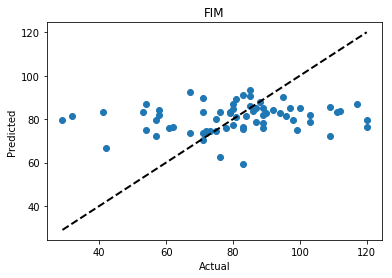

In [311]:
# plot actual vs predicted
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# cross_val_predict on the 120 second data
predicted = cross_val_predict(model, X_fim, y_fim, cv=len(X_fim))

fig, ax = plt.subplots()
ax.scatter(y_fim, predicted)
ax.plot([y_fim.min(), y_fim.max()], [y_fim.min(), y_fim.max()], 'k--', lw=2)
plt.title('FIM')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()